# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A Introduction to Data Science 


## Lab 5:  Exploratory Data Analysis, `seaborn`, more Plotting

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>
**Material Preparation:** Eleni Kaxiras.

---

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

In [2]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

## Learning Goals

By the end of this lab, you should be able to:
- know how to implement the different types of plots such as histograms, boxplots, etc, that were mentioned in class.
- have `seaborn` as well as `matplotlib` in your plotting toolbox.

**This lab corresponds to lecture 6 up to 9 and maps to homework 3.**

## Table of Contents

* [1 - Visualization Inspiration](#inspire)

* [2 - Intro to `seaborn` plotting](#seaborn)

* [3 - Different types of plots (histograms, boxplots, etc)](#plots)

* [4 - Excercise: EDA on Medical Data](#exercise)

<a class="anchor" id="inspire"></a>
## 1 - Visualization Inspiration

![title](../images/WGOITG.jpg)

[source: nytimes.org](https://www.nytimes.com/2018/08/27/learning/whats-going-on-in-this-graph-is-now-weekly-stem-teachers-explain-why-its-a-powerful-activity.html)

Notice that in “Summers Are Getting Hotter,” above, the histogram has intervals for global summer temperatures on the x-axis, designated from extremely cold to extremely hot, and their frequency on the y-axis. 

That was an **infographic** intended for the general public. In contrast, take a look at the plots below of the same data published at a **scientific journal**. They look quite different, don't they?

![title](../images/F4.jpeg)

*James Hansen, Makiko Sato, and Reto Ruedy*, Perception of climate change. [PNAS](https://www.pnas.org/content/109/37/E2415.full#abstract-1)

<a class="anchor" id="seaborn"></a>
## 2 - Implementing Various Types of Plots using `matplotlib`  and `seaborn`.

Before you start coding your visualization, you need to decide what **type** of vizualization to use. A box plot, a histogram, a scatter plot, or something else? That will depend on the purpose of the plot (is it for performing an inspection on your data (EDA, or for showing your results/conclusions to people) and the number variables that you want to plot.

You have a lot of tools for plotting in Python. The basic one, of course, is `matplotlib` and there are other libraries that are built on top of it, such as `seaborn`, `bokeh`, or `altair`. 

In this class we will continue using `matplotlib` and also look into [`seaborn`](https://seaborn.pydata.org). Those two libraries are the ones you should be using for homework.

### Introduction to `seaborn`

`Seaborn` is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics. The library provides a database of useful datasets for educational purposes that can be loaded by typing:

```python
seaborn.load_dataset(name, cache=True, data_home=None, **kws)
```

For information on what these datasets are : https://github.com/mwaskom/seaborn-data

#### The plotting functions in `seaborn` can be decided in two categories

- **'axes-level'** functions, such as `regplot`, `boxplot`, `kdeplot`, `scatterplot`, `distplot` which can connect with the `matplotlib` Axes object and its parameters. You can use that object as you would in `matplotlib`:
```python
f, (ax1, ax2) = plt.subplots(2)
sns.regplot(x, y, ax=ax1)
sns.kdeplot(x, ax=ax2)
ax1 = sns.distplot(x, kde=False, bins=20)
```

- **'figure-level'** functions, such as `lmplot`, `factorplot`, `jointplot`, `relplot`, `pairplot`. In this case, `seaborn` organizes the resulting plot which may include several Axes in a meaningful way. That means that the functions need to have total control over the figure, so it isn't possible to plot, say, an `lmplot` onto one that already exists. Calling the function always initializes a figure and sets it up for the specific plot it's drawing. These functions return an object of the type `FacetGrid` with its own methods for operating on the resulting plot.

To set the parameters for figure-level functions:

```python
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
```

### The Titanic dataset

The `titanic.csv` file contains data for 887 passengers on the Titanic. Each row represents one person. The columns describe different attributes about the person including whether they survived, their age, their on-board class, their sex, and the fare they paid. 

In [4]:
titanic = sns.load_dataset('titanic');
titanic.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [5]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], dtype='object')

<div class='exercise'> <b> Exercise:  Drop the following features:</div>
    
'embarked', 'who', 'adult_male', 'embark_town', 'alive', 'alone' 

In [6]:
# your code here
mary = ['embarked', 'who', 'adult_male', 'embark_town', 'alive', 'alone']
titanic = titanic.drop(columns=mary)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,class,deck
0,0,3,male,22.0,1,0,7.2500,Third,NaN
1,1,1,female,38.0,1,0,71.2833,First,C
2,1,3,female,26.0,0,0,7.9250,Third,NaN
3,1,1,female,35.0,1,0,53.1000,First,C
4,0,3,male,35.0,0,0,8.0500,Third,NaN
5,0,3,male,NaN,0,0,8.4583,Third,NaN
6,0,1,male,54.0,0,0,51.8625,First,E
7,0,3,male,2.0,3,1,21.0750,Third,NaN
8,1,3,female,27.0,0,2,11.1333,Third,NaN
9,1,2,female,14.0,1,0,30.0708,Second,NaN


<div class='exercise'> <b> Exercise:  Find for how many passengeres we do not have their deck information.</div>

In [7]:
# your code here
missing_decks = len(titanic[(pd.isna(titanic['deck']) == True)])
missing_decks

688

### Histograms

#### Plotting one variable's distribution (categorical and continous)
The most convenient way to take a quick look at a univariate distribution in `seaborn` is the `distplot()` function. By default, this will draw a histogram and fit a kernel density estimate (KDE).

A histogram displays a quantitative (numerical) distribution by showing the number (or percentage) of the data values that fall in specified intervals. The intervals are on the x-axis and the number of values falling in each interval, shown as either a number or percentage, are represented by bars drawn above the corresponding intervals.

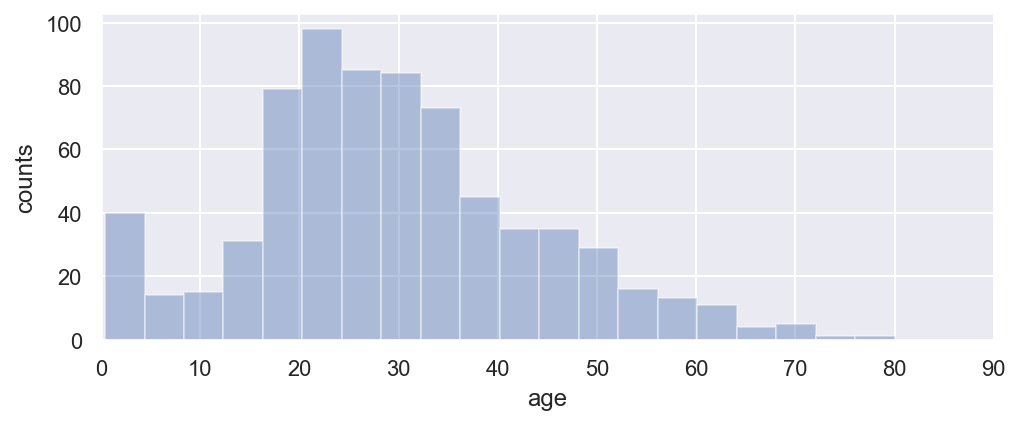

In [8]:
# What was the age distribution among passengers in the Titanic?
import seaborn as sns
sns.set(color_codes=True)

f, ax = plt.subplots(1,1, figsize=(8, 3));
ax = sns.distplot(titanic.age, kde=False, bins=20)

# bug
#ax = sns.distplot(titanic.age, kde=False, bins=20).set(xlim=(0, 90));

ax.set(xlim=(0, 90));
ax.set_ylabel('counts');

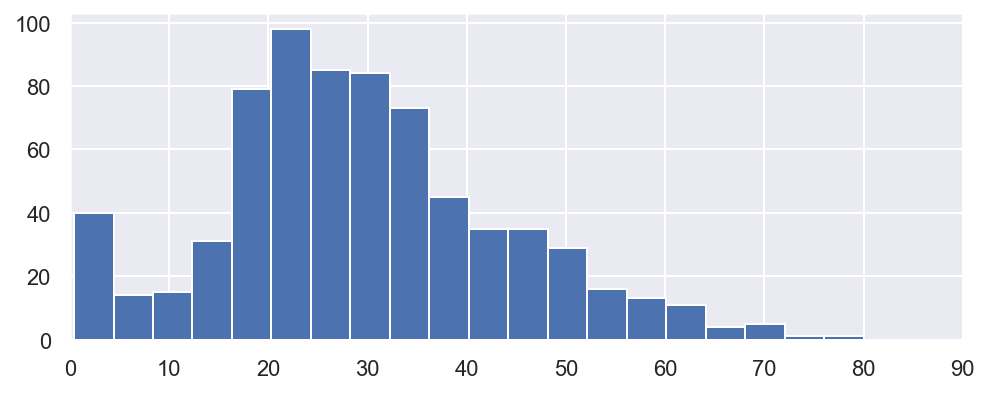

In [9]:
f, ax = plt.subplots(1,1, figsize=(8, 3))
ax.hist(titanic.age, bins=20);
ax.set_xlim(0,90);

<div class='exercise'> <b> Exercise (pandas trick): Count all the infants on board (age less than 3) and all the children ages 3-10.</div>

In [10]:
# your code here
infants = len(titanic[(titanic.age < 3)]) 
children = len(titanic[(titanic.age >= 3) & (titanic.age < 10)]) 
print(f'There were {infants} infants and {children} children on board the Titanic')

There were 24 infants and 38 children on board the Titanic


**Pandas trick:** We want to creat virtual "bins" for readability and replace ranges of values with categories. 

We will do this in an ad hoc way, **it can be done better**. For example in the previous plot we could set:
    
- `(age<3) = 'infants'`, 
- `(3<age<18)='children'`, 
- `(18<values<90)='adults'` <BR>

See matplotlib [colors](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html) here.

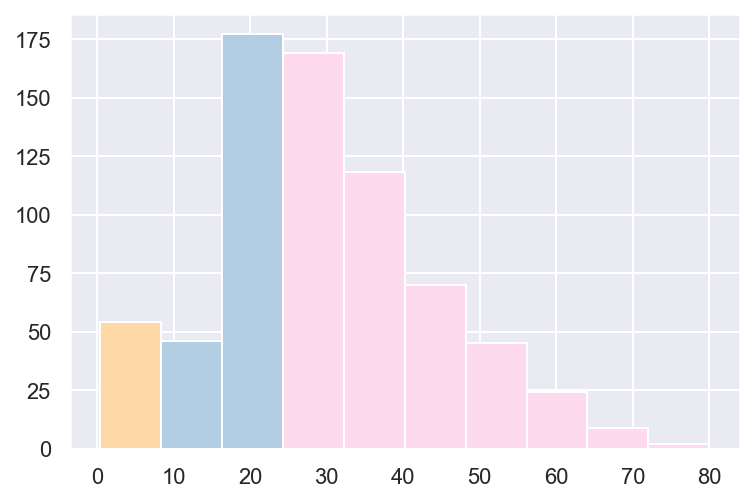

In [11]:
# set the colors
cmap = plt.get_cmap('Pastel1')
young = cmap(0.5)
middle = cmap(0.2)
older = cmap(0.8)

# get the object we will change - patches is an array with len: num of bins
fig, ax = plt.subplots()
y_values, bins, patches = ax.hist(titanic.age, 10)

[patches[i].set_facecolor(young) for i in range(0,1)] # bin 0
[patches[i].set_facecolor(middle) for i in range(1,3)] # bins 1 and 2
[patches[i].set_facecolor(older) for i in range(3,10)] # 7 remaining bins 

ax.grid(True)
fig.show()

#### Kernel Density Estimation
The kernel density estimate can be a useful tool for plotting the shape of a distribution. The **bandwidth (bw)** parameter of the KDE controls how tightly the estimation is fit to the data, much like the bin size in a histogram. It corresponds to the width of the kernels we plotted above. The default behavior tries to guess a good value using a common reference rule, but it may be helpful to try larger or smaller values.

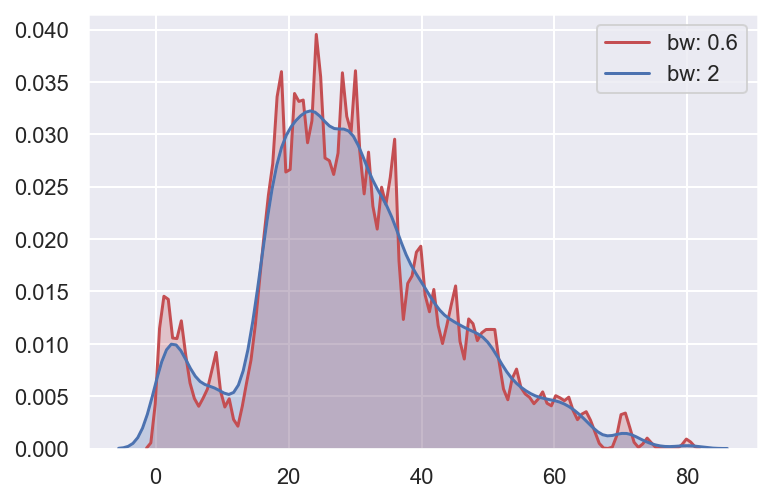

In [12]:
sns.kdeplot(titanic.age, bw=0.6, label="bw: 0.6", shade=True, color="r");
sns.kdeplot(titanic.age, bw=2, label="bw: 2", shade=True);

<div class='exercise'> <b> Exercise:  Plot the distribution of fare paid by passengers </div>

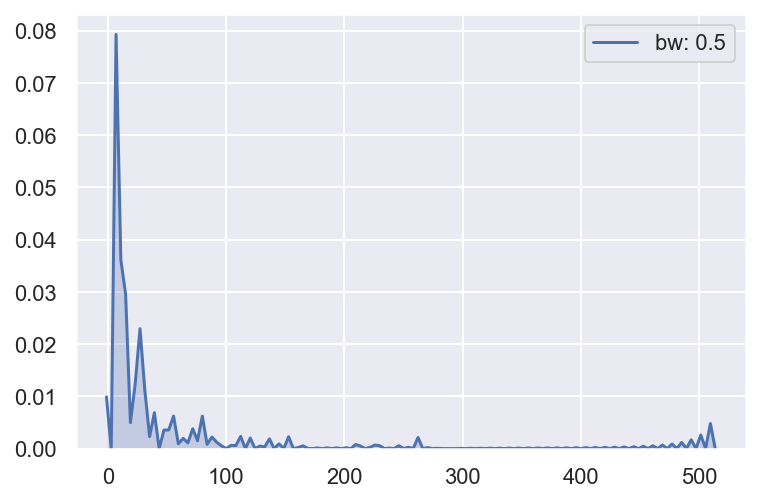

In [13]:
# your code here
sns.kdeplot(titanic.fare, bw=0.5, label="bw: 0.5", shade=True);

#### You can mix elements of `matplotlib` such as Axes with `seaborn` elements for a best use of both worlds.

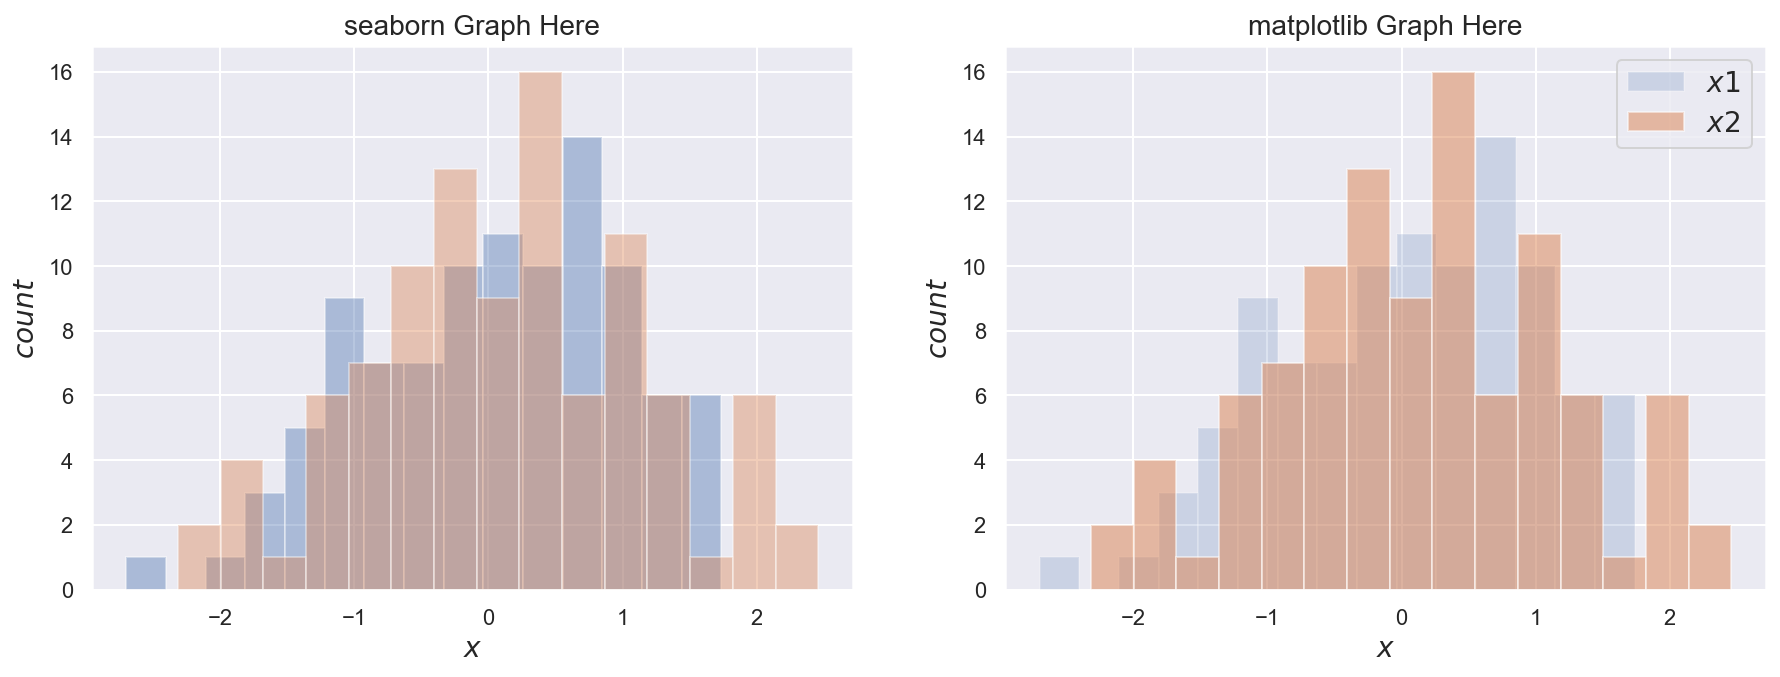

In [14]:
import seaborn as sns
sns.set(color_codes=True)

x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)

fig, ax = plt.subplots(1,2, figsize=(15,5))

# seaborn goes in first subplot
sns.set(font_scale=0.5)
sns.distplot(x1, kde=False, bins=15, ax=ax[0]);
sns.distplot(x2, kde=False, bins=15, ax=ax[0]);
ax[0].set_title('seaborn Graph Here', fontsize=14)
ax[0].set_xlabel(r'$x$', fontsize=14)
ax[0].set_ylabel(r'$count$', fontsize=14)

# matplotlib goes in second subplot
ax[1].hist(x1, alpha=0.2, bins=15, label=r'$x1$');
ax[1].hist(x2, alpha=0.5, bins=15, label=r'$x2$');
ax[1].set_xlabel(r'$x$', fontsize=14)
ax[1].set_ylabel(r'$count$', fontsize=14)
ax[1].set_title('matplotlib Graph Here', fontsize=14)
ax[1].legend(loc='best', fontsize=14);

#### Introduding the heart disease dataset. 

More on this in the in-class exercise at the end of the notebook. 

In [15]:
columns = ["age", "sex", "cp", "restbp", "chol", "fbs", "restecg", 
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
heart_df = pd.read_csv('../data/heart_disease.csv', header=None, names=columns)

heart_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


### Boxplots

#### One variable.

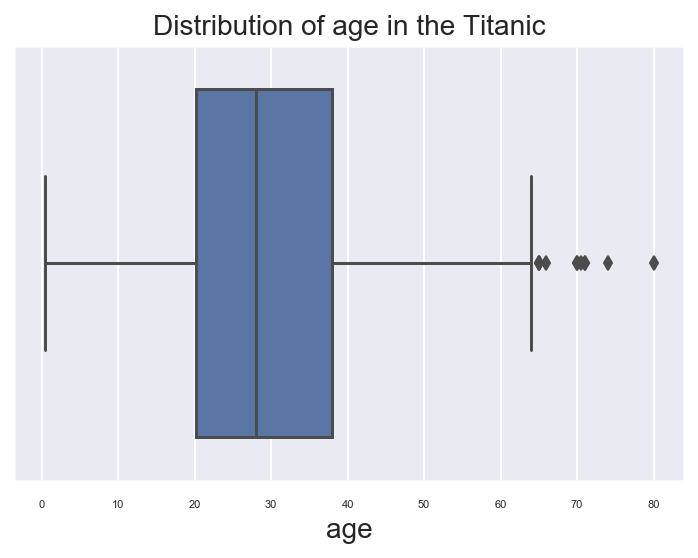

In [16]:
# seaborn
ax = sns.boxplot(x='age', data=titanic)
#ax = sns.boxplot(x=titanic['age']) # another way to write this
ax.set_ylabel(None);
ax.set_xlabel('age', fontsize=14);
ax.set_title('Distribution of age in the Titanic', fontsize=14);

#### Two variables

<div class='exercise'> <b> Exercise:  Did more young people or older ones get first class tickets on the Titanic?</div>

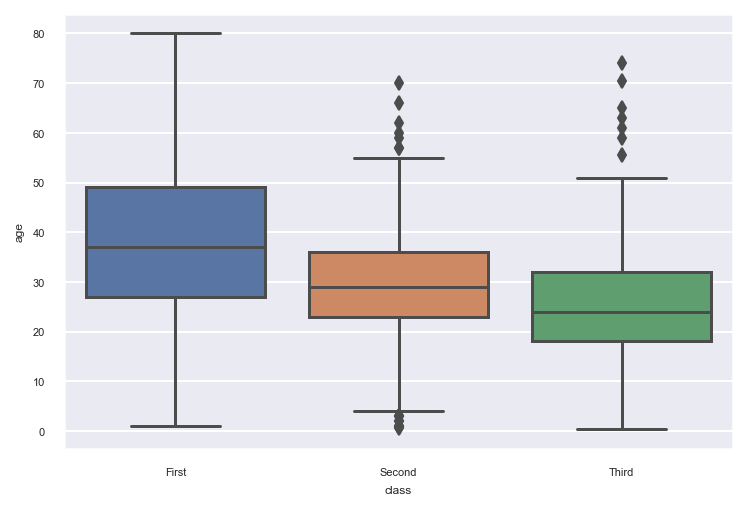

In [17]:
# your code here
# two variables seaborn
ax = sns.boxplot(x="class", y="age", data=titanic)

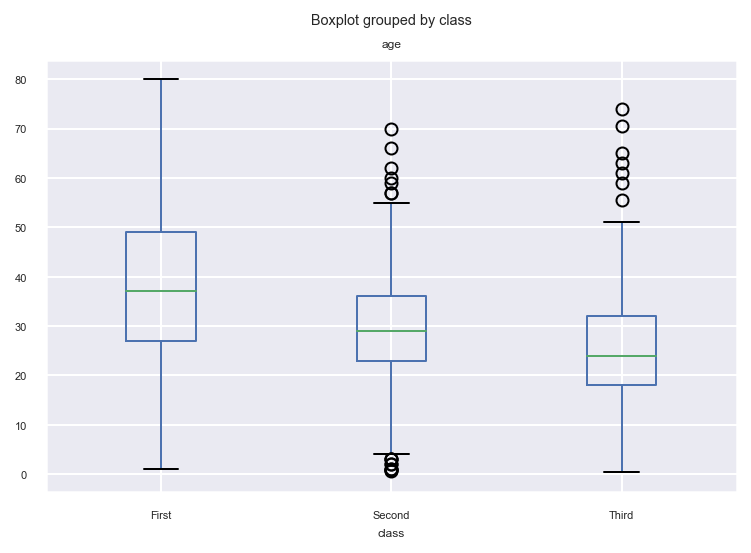

In [18]:
# two variable boxplot in pandas
titanic.boxplot('age',by='class')

### Scatterplots

#### Plotting the distribution of two variables

Also called a bivariate distribution where each observation is shown with  a point with x and y values. You can draw a scatterplot with the `matplotlib plt.scatter` function, or the `seaborn jointplot()` function:

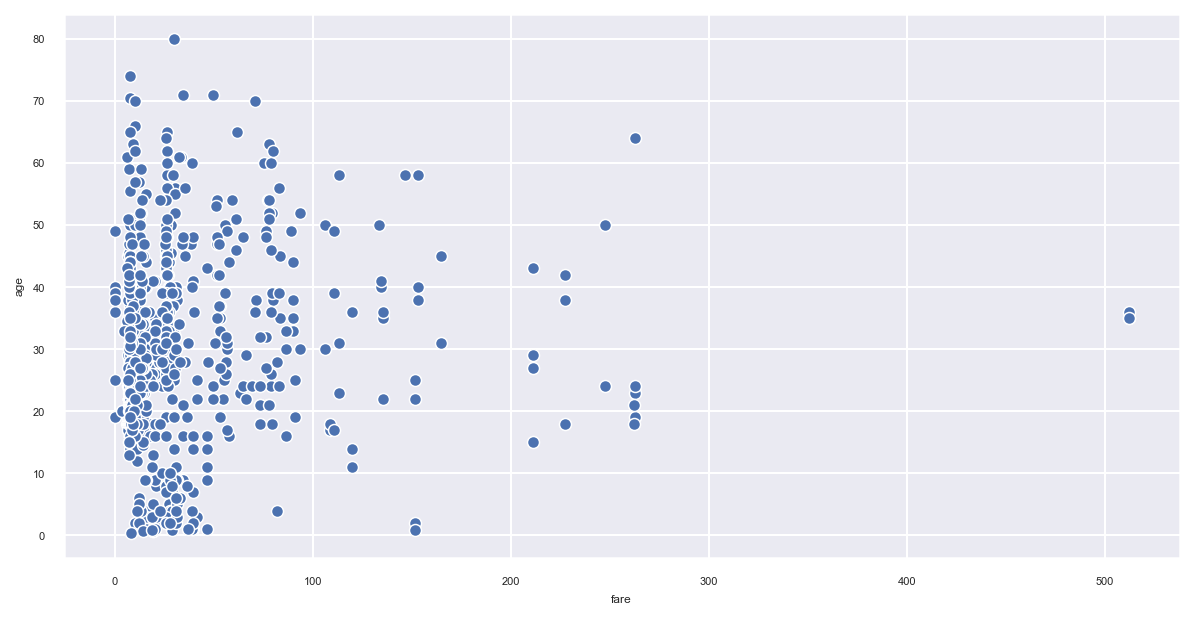

In [19]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", data=titanic, ax=ax); 

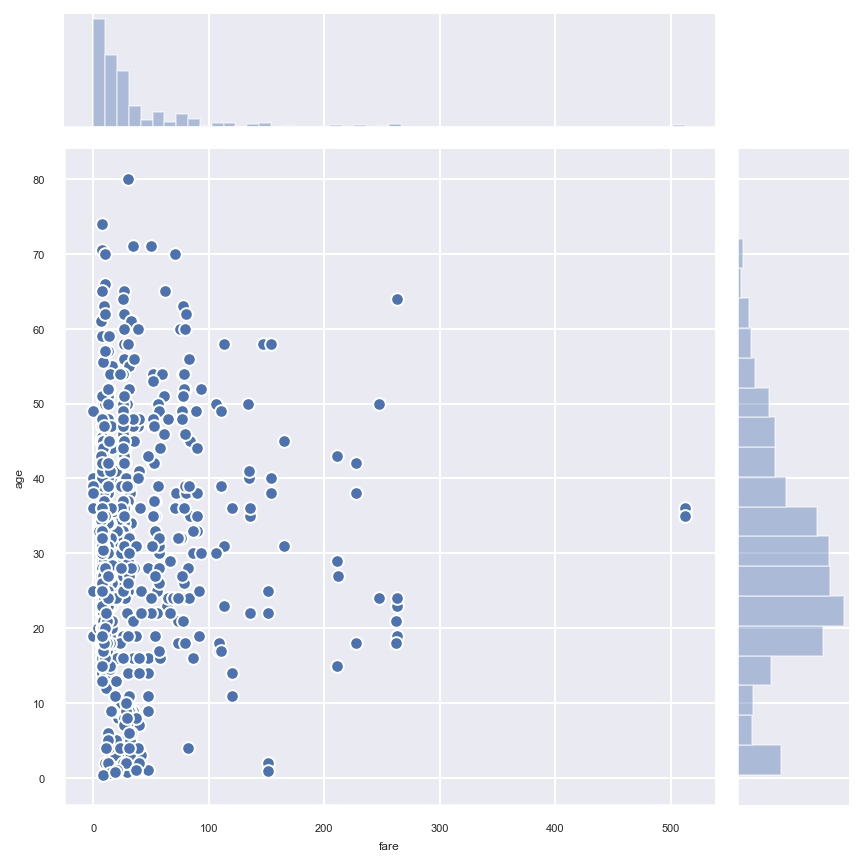

In [20]:
sns.jointplot("fare", "age", data=titanic, s=40, edgecolor="w", linewidth=1)

You may control the `seaborn` [Figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html).

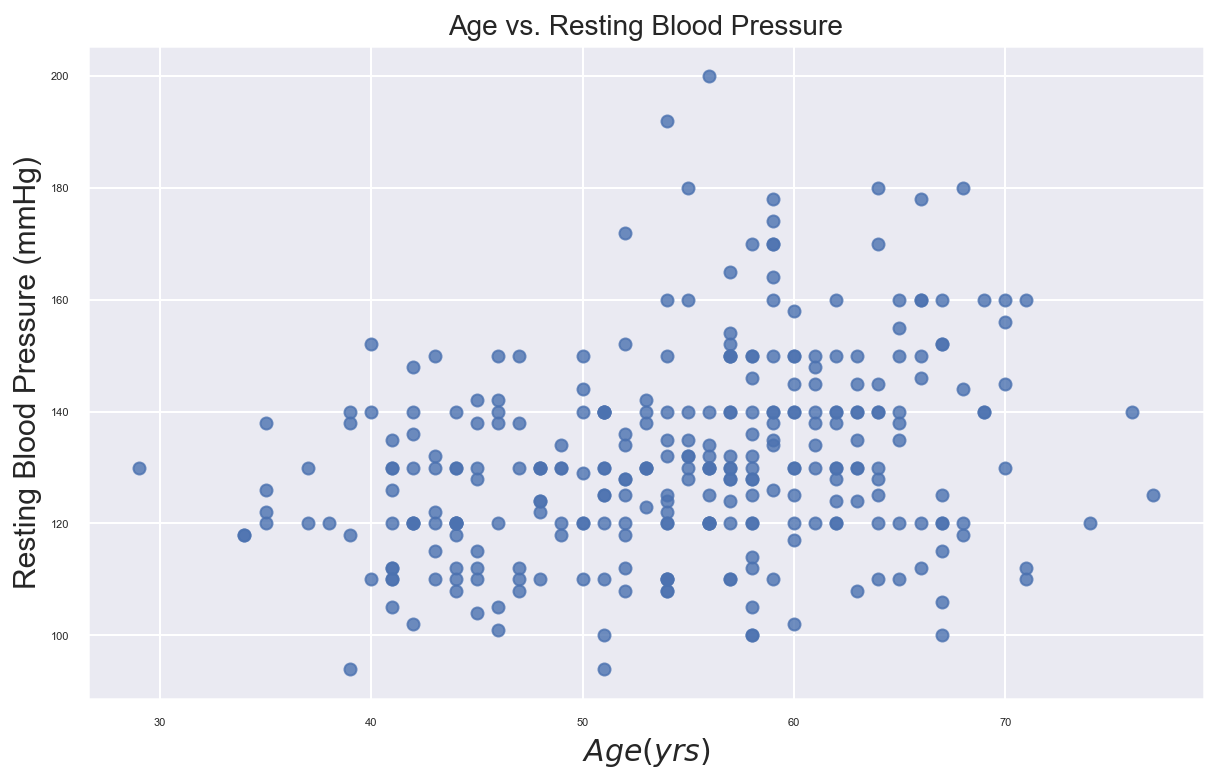

In [21]:
# matplotlib
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.scatter(heart_df['age'], heart_df['restbp'], alpha=0.8);
ax.set_xlabel(r'$Age (yrs)$', fontsize=15);
ax.set_ylabel(r'Resting Blood Pressure (mmHg)', fontsize=15);
ax.set_title('Age vs. Resting Blood Pressure', fontsize=14)
plt.show();

#### Plotting the distribution of three variables

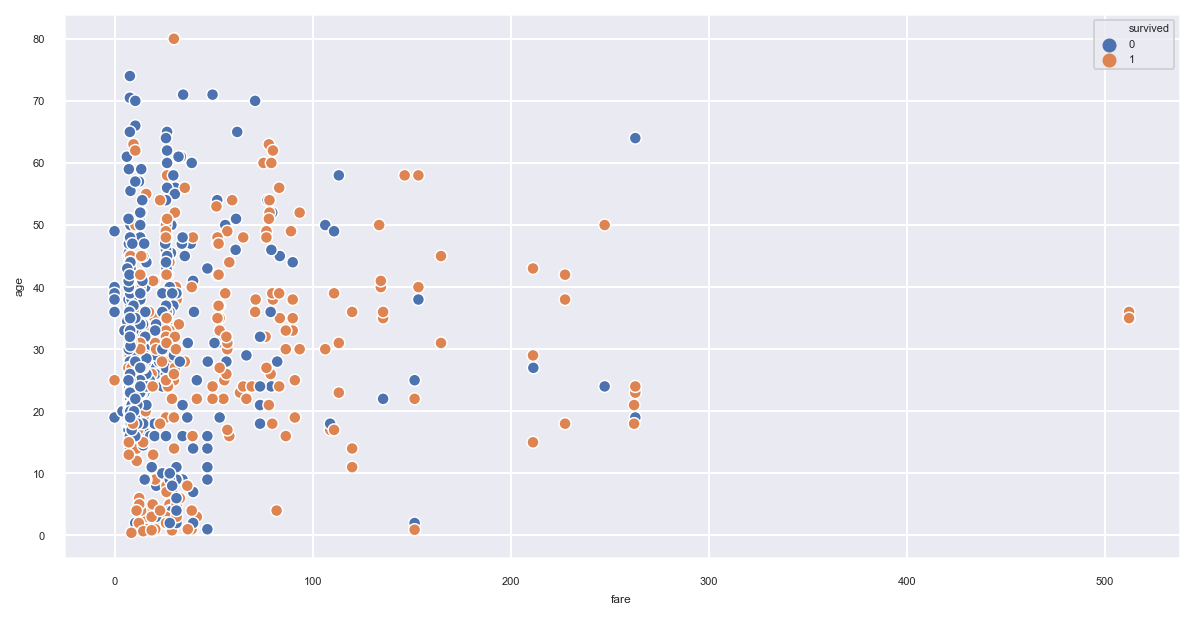

In [22]:
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", hue="survived", data=titanic, ax=ax);

#### Plotting the distribution of four variables (going too far?)

<div class='exercise'> <b> Exercise:  Plot the distribution of fare paid by passengers according to age, survival and sex. </div>
    
Use `size=` for the fourth variable

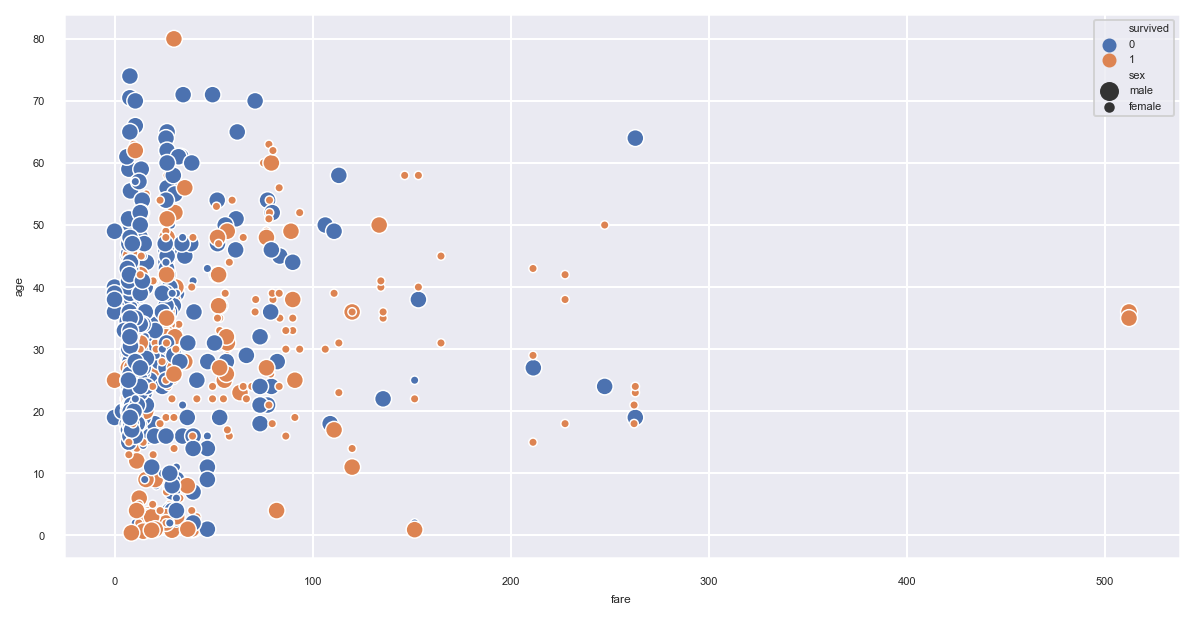

In [23]:
# your code here
f, ax = plt.subplots(1,1, figsize=(10, 5))
sns.scatterplot(x="fare", y="age", hue="survived", size="sex", data=titanic, ax=ax);

### Pairplots

In [24]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'deck'], dtype='object')

In [25]:
to_plot = ['age', 'fare', 'survived', 'deck']

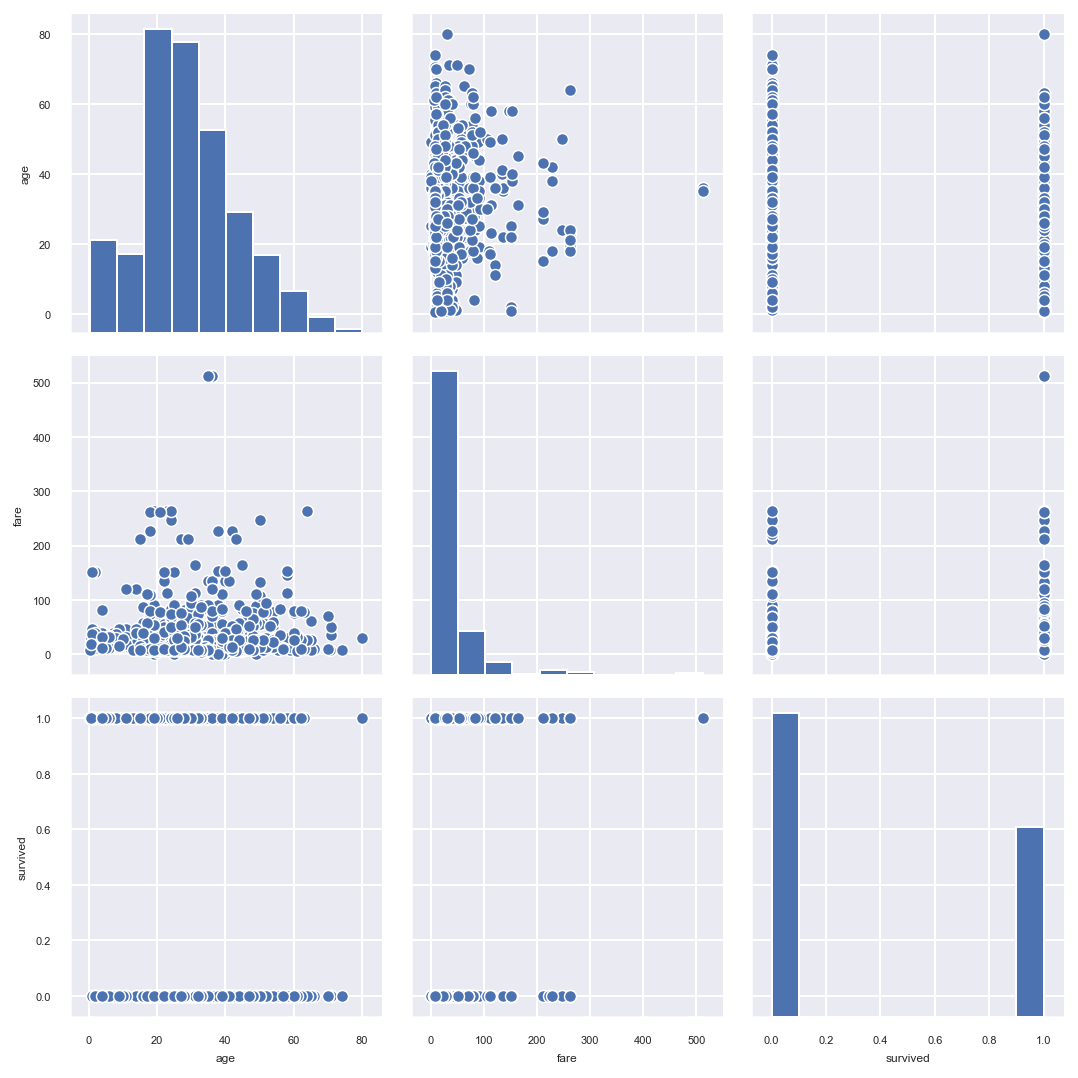

In [26]:
df_to_plot = titanic.loc[:,to_plot]
sns.pairplot(df_to_plot);

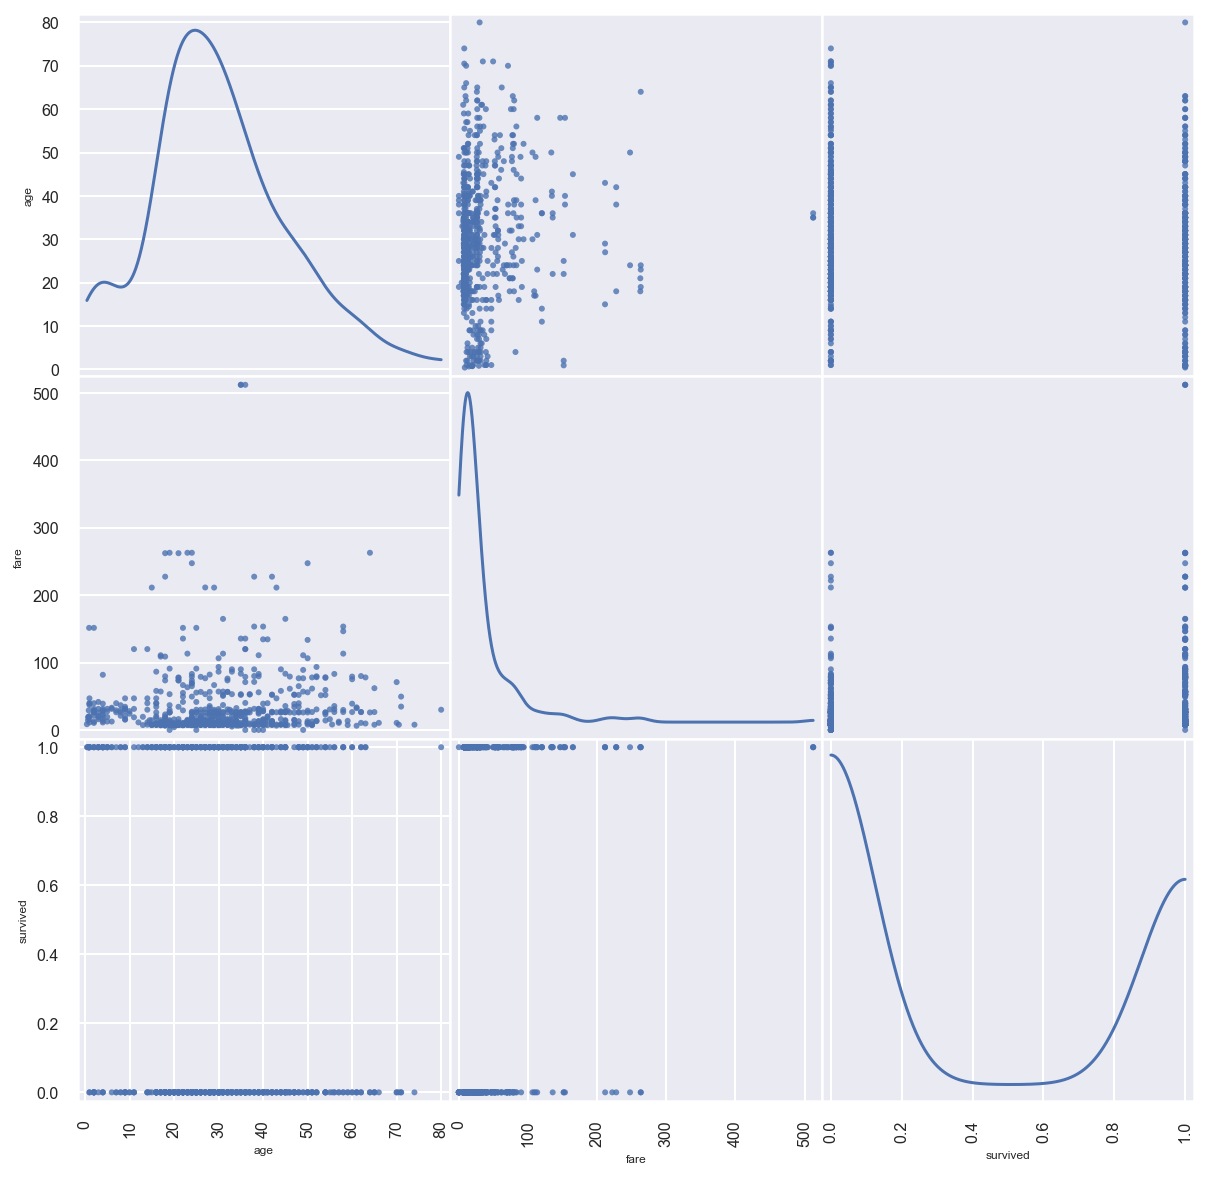

In [27]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_to_plot, alpha=0.8, figsize=(10, 10), diagonal='kde');

### Plotting Categorical Variables

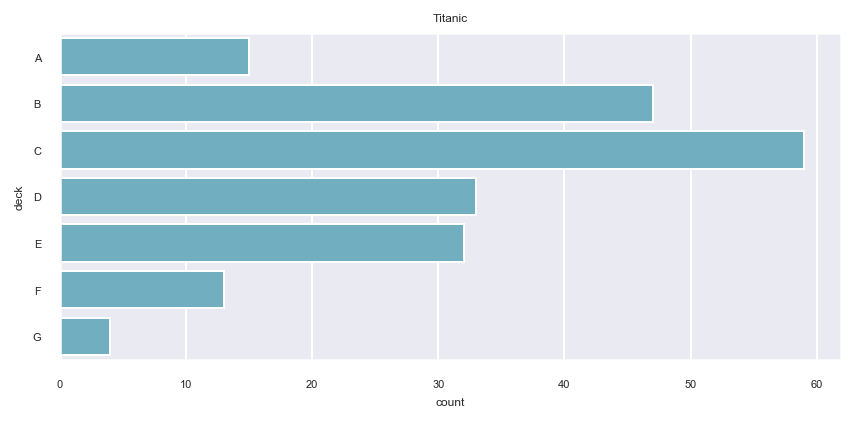

In [28]:
titanic = sns.load_dataset('titanic')
f, ax = plt.subplots(figsize=(7, 3));
ax = sns.countplot(y="deck", data=titanic, color="c");
ax.set_title('Titanic');

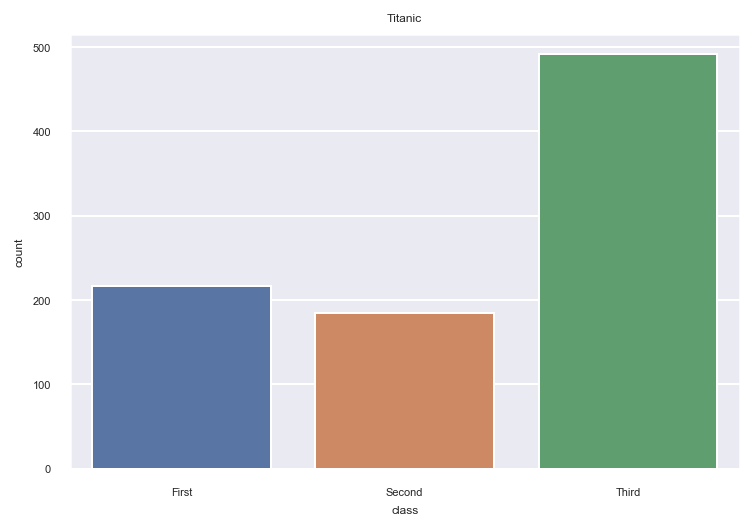

In [29]:
ax = sns.countplot(x="class", data=titanic)
ax.set_title('Titanic');

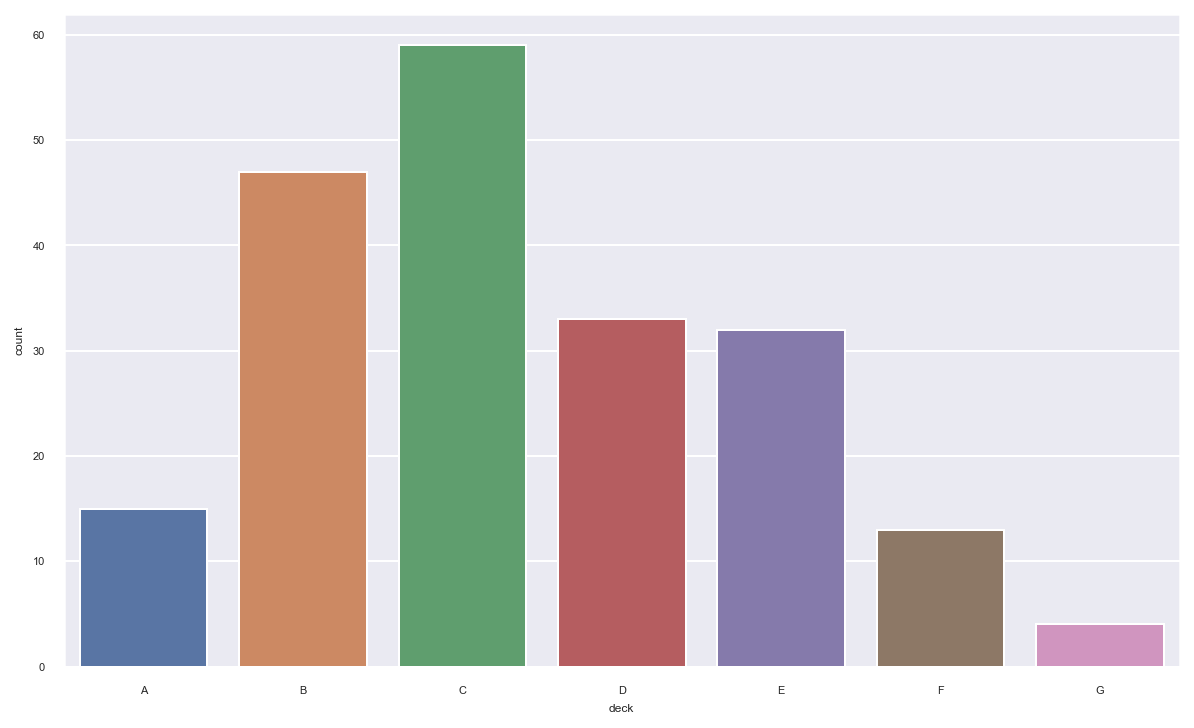

In [30]:
fig, ax = plt.subplots(figsize=(10,6)) # Create figure object
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
ax = sns.countplot(x="deck", data=titanic)

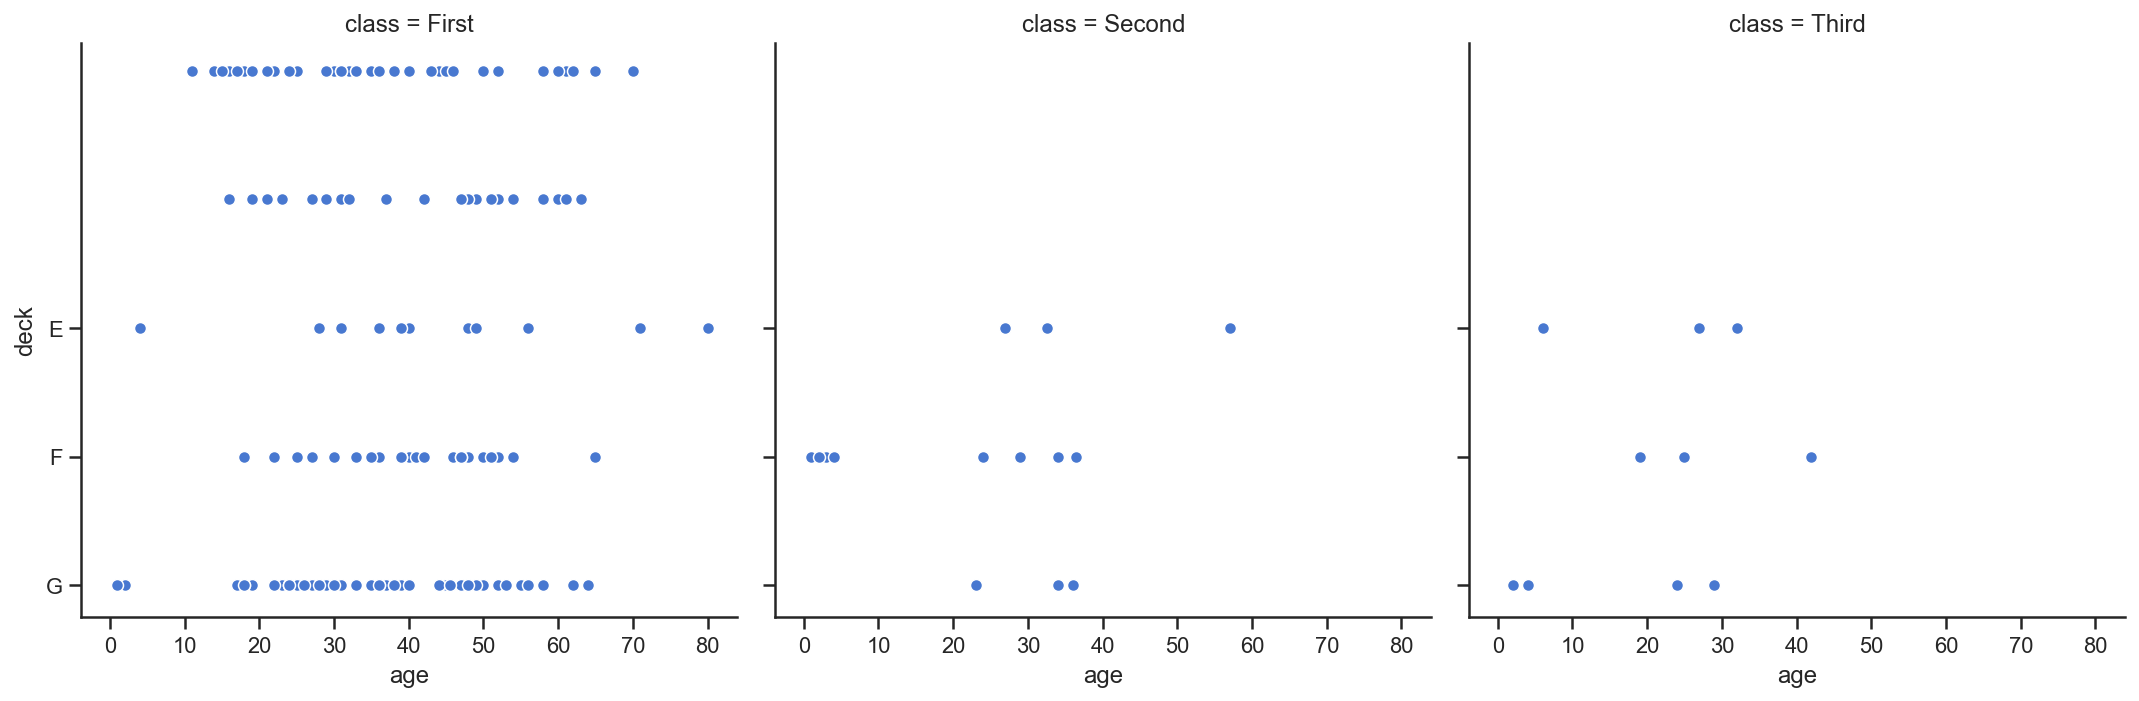

In [31]:
sns.set(style="ticks", palette="muted")
sns.relplot(x="age", y="deck", col="class", data=titanic);

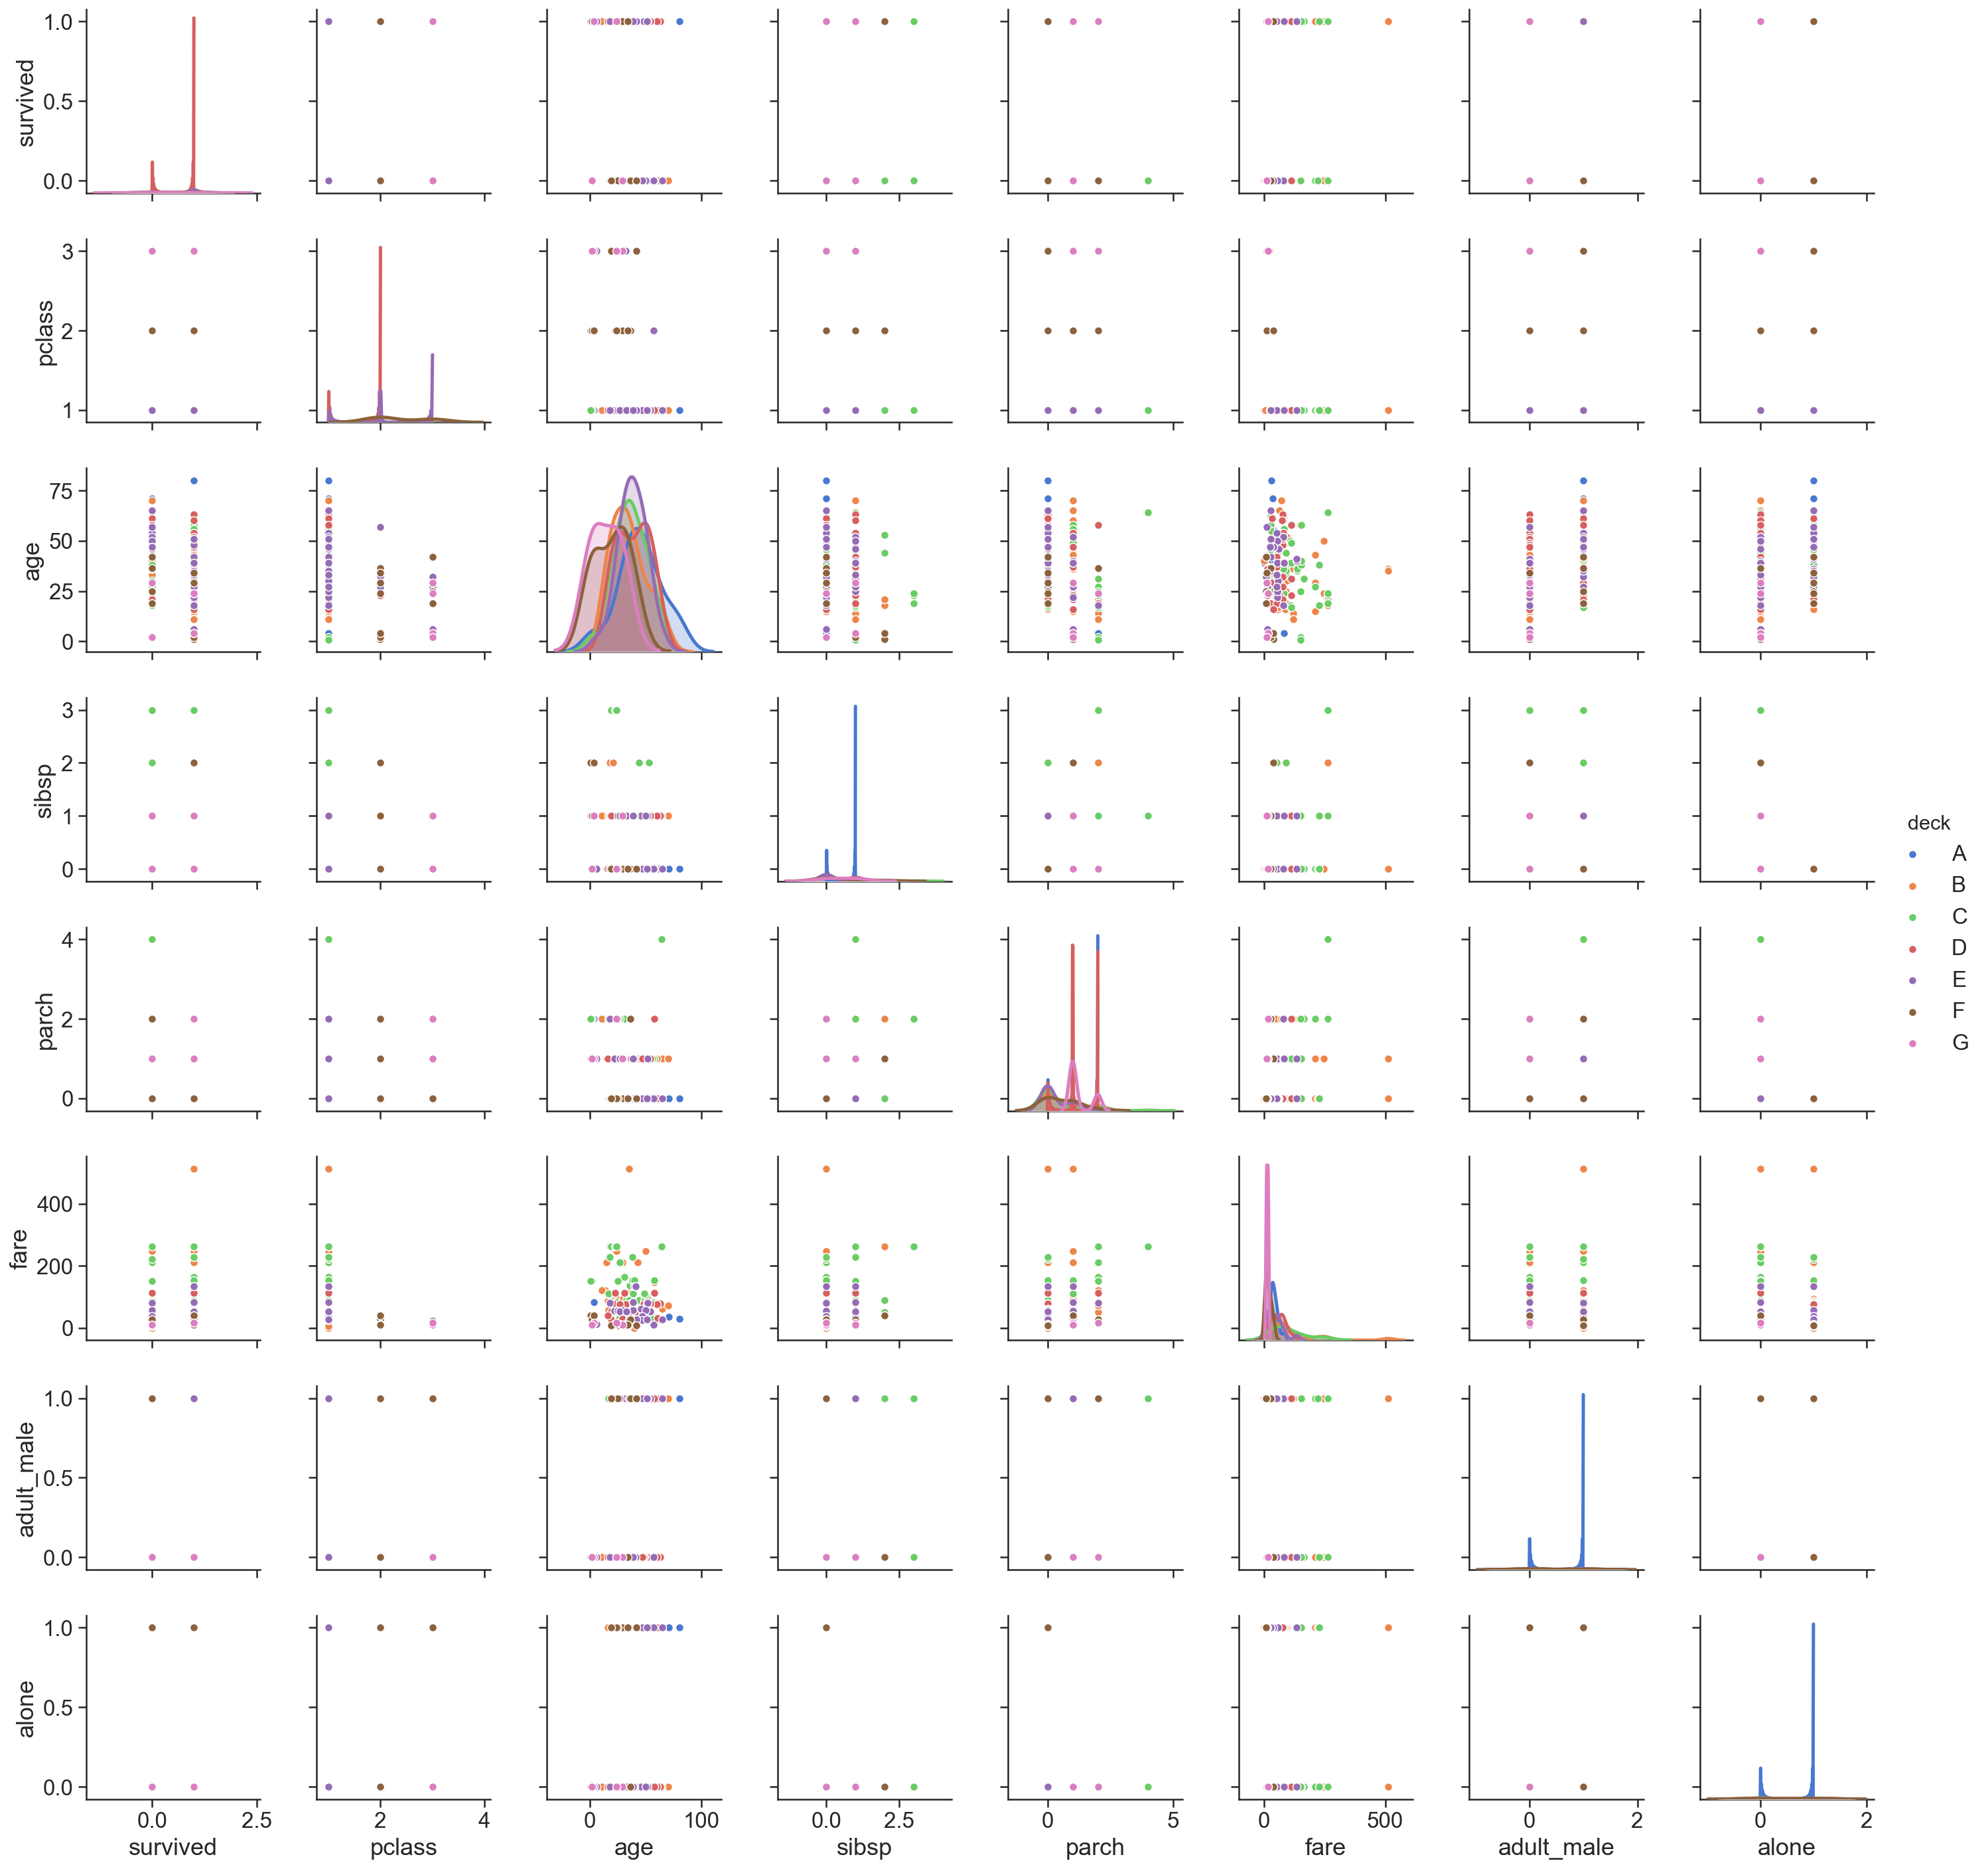

In [32]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.pairplot(data=titanic, hue="deck");

### Introduction to `pandas` plotting.

There is plotting functionality built in `pandas`. Look for it in the `pandas` "encyclopedia", a mere 2883-page pdf from the creator Wes McKinney: [pandas documentation (pdf)](https://pandas.pydata.org/pandas-docs/stable/pandas.pdf) 

**Example:** The `value_counts()` Series method and top-level function computes a histogram of a 1D array of values. It can
also be used as a function on regular arrays.

Reminder: DataFrame: “index” (axis=0, default), “columns” (axis=1) 

### Line Graph

#### Good for time dependency or when a variable evolves

In [33]:
df = pd.DataFrame(np.random.randn(1000, 4), columns=['A', 'B', 'C', 'D'])
df.head()

,A,B,C,D
0,-0.901968,-0.903405,0.077560,0.521284
1,0.888037,0.366559,0.922404,-1.063654
2,1.177014,0.387151,0.817410,-0.140485
3,0.182513,0.818129,1.276844,-0.589295
4,-0.012289,1.736152,2.150071,0.306848


In [34]:
# cumulative sum adds column values as it goes
df = df.cumsum()
df.head()

,A,B,C,D
0,-0.901968,-0.903405,0.077560,0.521284
1,-0.013931,-0.536846,0.999964,-0.542370
2,1.163083,-0.149696,1.817374,-0.682855
3,1.345596,0.668433,3.094218,-1.272151
4,1.333308,2.404585,5.244289,-0.965303


<Figure size 432x288 with 0 Axes>

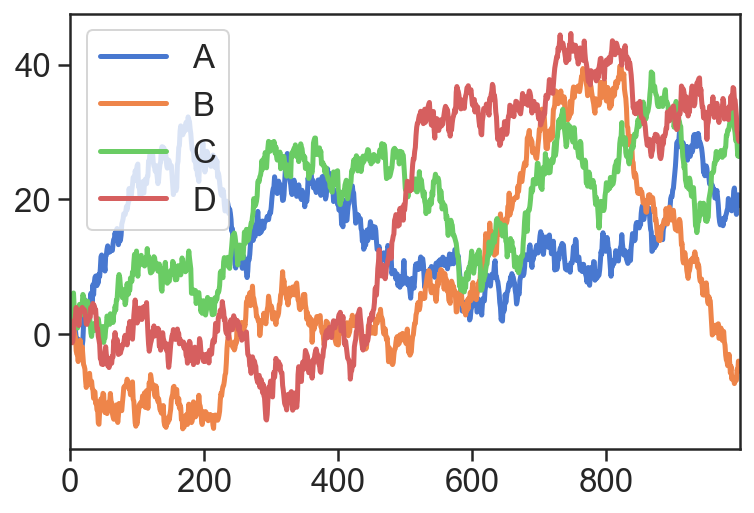

In [35]:
plt.figure();
df.plot();
plt.legend(loc='best');

<Figure size 432x288 with 0 Axes>

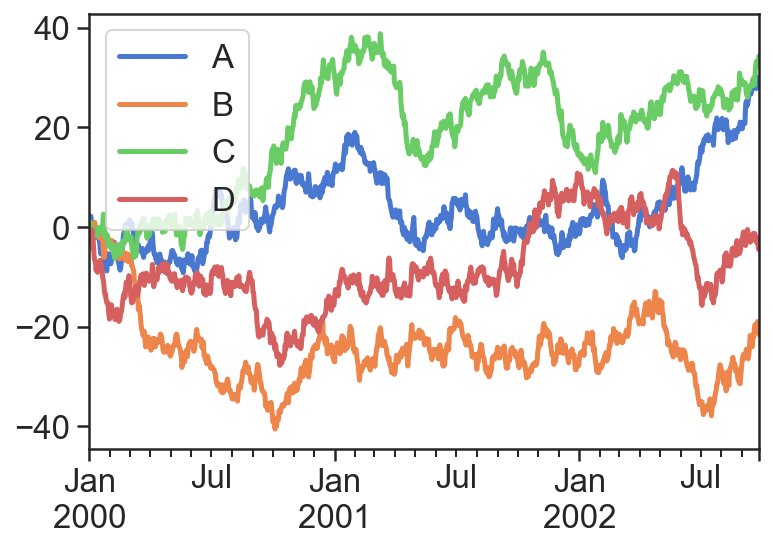

In [36]:
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2000', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), 
                  index=ts.index, columns=list('ABCD'))

df = df.cumsum()
plt.figure();
df.plot();

Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

- ‘bar’ or ‘barh’ for bar plots
- ‘hist’ for histogram
- ‘box’ for boxplot
- ‘kde’ or ‘density’ for density plots
- ‘area’ for area plots
- ‘scatter’ for scatter plots
- ‘hexbin’ for hexagonal bin plots
- ‘pie’ for pie plots

In addition to these kind s, there are the `DataFrame.hist()`, and `DataFrame.boxplot()` methods, which use a separate interface. `scatter_matrix` in pandas.plotting takes a Series or DataFrame as an argument.

### Bar Plots

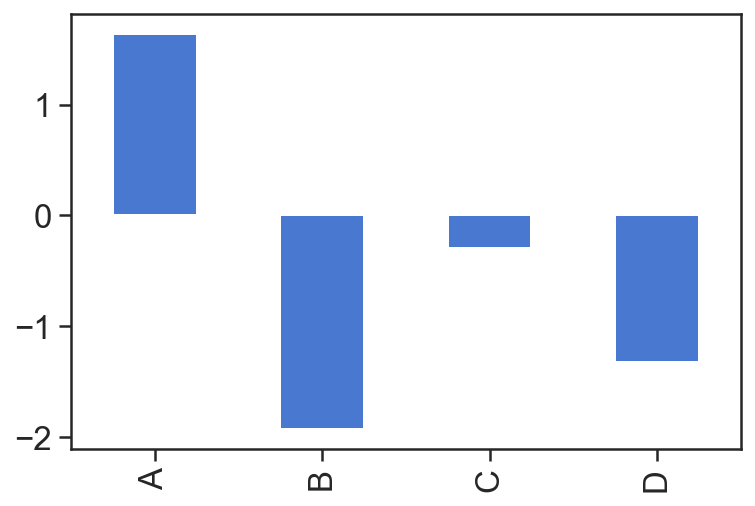

In [37]:
plt.figure();
df.iloc[0].plot(kind='bar');

In [38]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2

,a,b,c,d
0,0.454420,0.746622,0.882708,0.136776
1,0.308146,0.532580,0.959242,0.523611
2,0.817849,0.592459,0.264127,0.433331
3,0.047301,0.443156,0.184870,0.632819
4,0.416718,0.887348,0.474812,0.608754
5,0.412307,0.846218,0.227158,0.028925
6,0.066179,0.813454,0.039594,0.458149
7,0.995446,0.177776,0.743172,0.855556
8,0.835294,0.689625,0.211755,0.654429
9,0.717569,0.009679,0.534921,0.078018


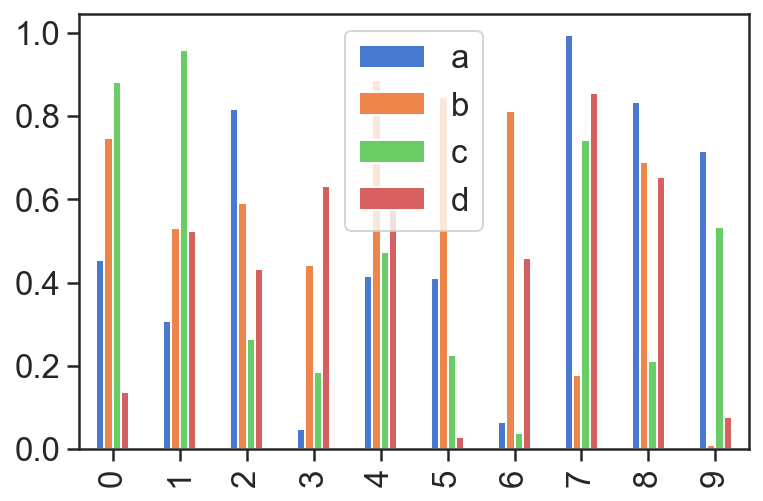

In [39]:
df2.plot.bar();

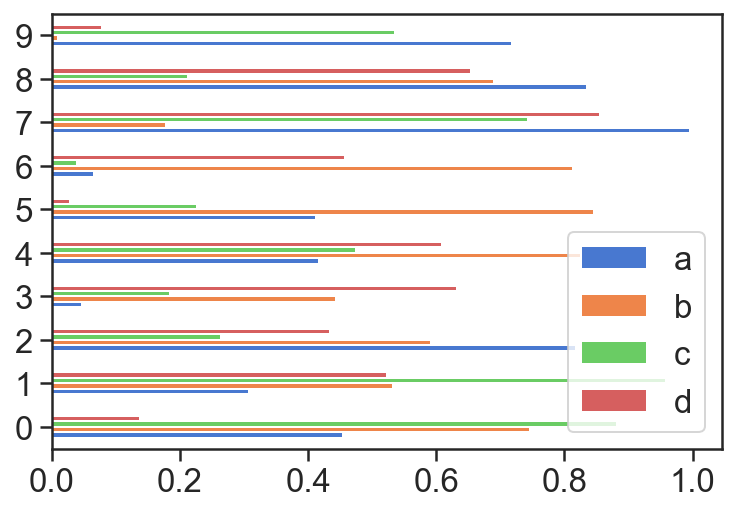

In [40]:
# horizontal bar plot
df2.plot.barh(stacked=False);

### Histograms

<Figure size 432x288 with 0 Axes>

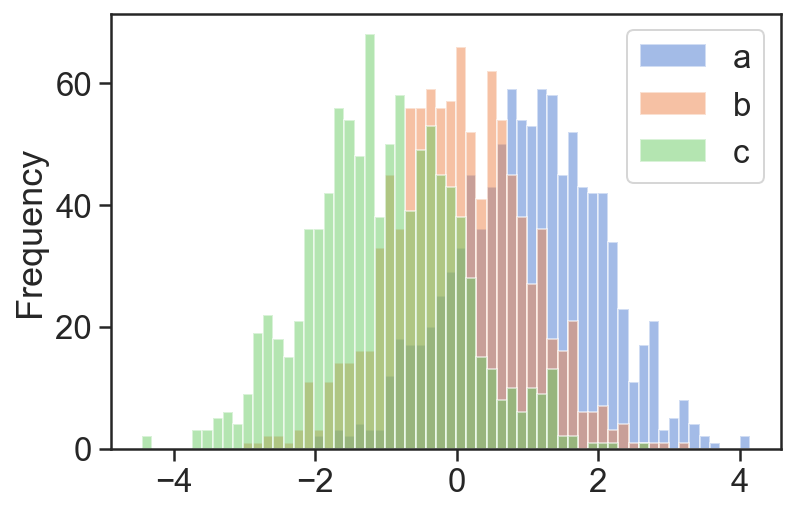

In [41]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000), 
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])

plt.figure();
df4.plot.hist(alpha=0.5, stacked=False, bins=60);

### Boxplots

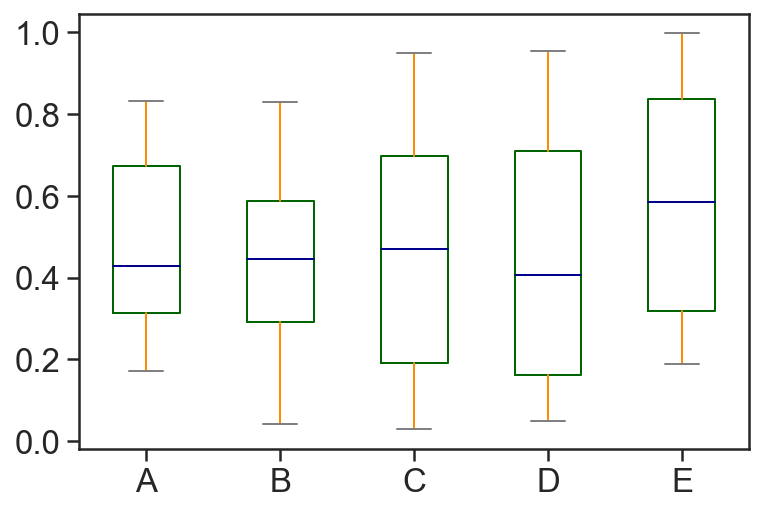

In [42]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange',
         'medians': 'DarkBlue', 'caps': 'Gray'}

df = pd.DataFrame(np.random.rand(10, 5), columns=['A', 'B', 'C', 'D', 'E'])
df.plot.box(color=color );

### Area plots

You can create area plots with `Series.plot.area()` and `DataFrame.plot.area()`. Area plots are stacked
by default. To produce stacked area plot, each column must be either all positive or all negative values.

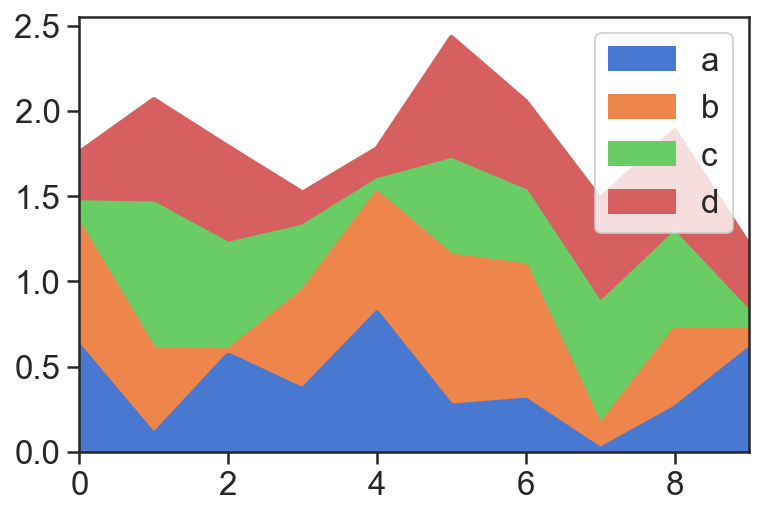

In [43]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.area(stacked=True);

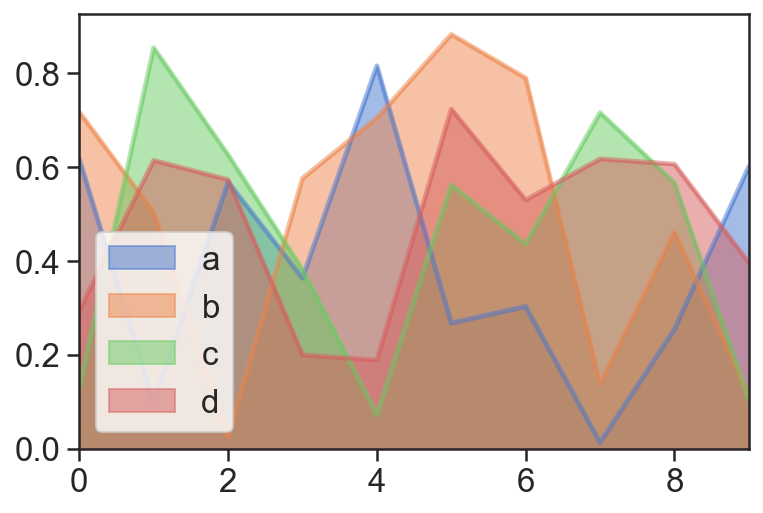

In [44]:
df.plot.area(stacked=False);

### Scatterplot

Scatter plot can be drawn by using the DataFrame.plot.scatter() method. Scatter plot requires numeric
columns for the x and y axes. These can be specified by the x and y keywords.

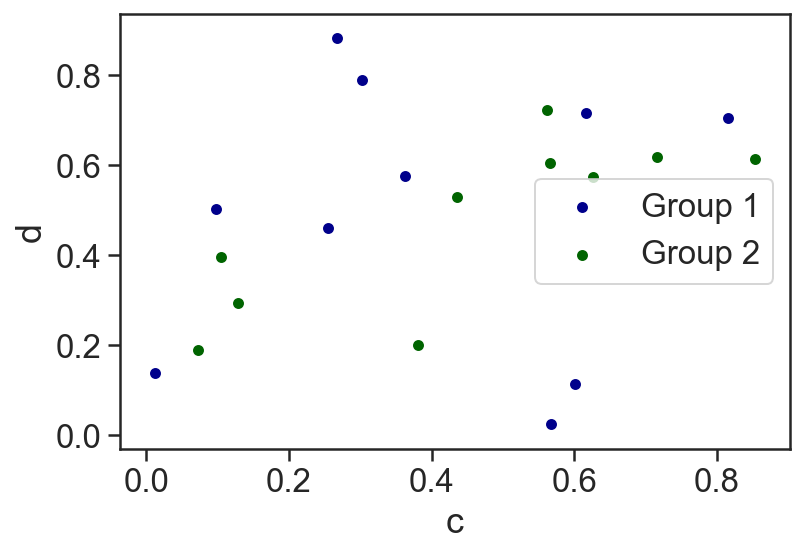

In [45]:
ax = df.plot.scatter(x='a', y='b', color='DarkBlue', label='Group 1');
df.plot.scatter(x='c', y='d', color='DarkGreen', label='Group 2', ax=ax);

### `pandas` Tricks

The copy() method on pandas objects copies the underlying data (though not the axis indexes, since they are immutable)
and returns a new object. Note that it is seldom necessary to copy objects. For example, there are only a
handful of ways to alter a DataFrame in-place:

- Inserting, deleting, or modifying a column.
- Assigning to the index or columns attributes.
- For homogeneous data, directly modifying the values via the values attribute or advanced indexing.

To be clear, no pandas method has the side effect of modifying your data; almost every method returns a new object,
leaving the original object untouched. If the data is modified, it is because you did so explicitly

<a class="anchor" id="#exercise"></a>
## 4 - Group Exercise: 1/2 hour in the Life of a Cardiologist 

Try each exercise on your own and then discuss with your peers sitting at your table. Feel free to engage the TFs and instructors as well. 

Visualize and explore the data. Use `.describe()` to look at your data and also examine if you have any missing values. <BR> 
What is the actual number of feature variables after converting categorical variables to dummy ones?<BR><BR>
**List of available variables (includes target variable `num`):**

- **age**: continuous
- **sex**: categorical, 2 values {0: female, 1: male}
- **cp** (chest pain type): categorical, 4 values
    {1: typical angina, 2: atypical angina, 3: non-angina, 4: asymptomatic angina}
- **restbp** (resting blood pressure on admission to hospital): continuous (mmHg)
- **chol (serum cholesterol level)**: continuous (mg/dl)
- **fbs** (fasting blood sugar): categorical, 2 values {0: <= 120 mg/dl, 1: > 120 mg/dl}
- **restecg** (resting electrocardiography): categorical, 3 values
    {0: normal, 1: ST-T wave abnormality, 2: left ventricular hypertrophy}
- **thalach** (maximum heart rate achieved): continuous
- **exang** (exercise induced angina): categorical, 2 values {0: no, 1: yes}
- **oldpeak** (ST depression induced by exercise relative to rest): continuous
- **slope** (slope of peak exercise ST segment): categorical, 3 values 
    {1: upsloping, 2: flat, 3: downsloping}
- **ca** (number of major vessels colored by fluoroscopy): discrete (0,1,2,3)
- **thal**: categorical, 3 values {3: normal, 6: fixed defect, 7: reversible defect}
- **num** (diagnosis of heart disease): categorical, 5 values 
    {0: less than 50% narrowing in any major vessel, 
    1-4: more than 50% narrowing in 1-4 vessels}

In [46]:
# load the dataset
heart_df = pd.read_csv('../data/heart_disease.csv', header=None, names=columns)
heart_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


### Answer the following question using plots

01. At what ages do people seek cardiological exams? 
02. Do men seek help more than women? 
03. Examine the variables. How do they relate to one another?
04. (Variation on 02): What % of men and women seek cardio exams? 
05. Does resting blood pressure increase with age?

**Pandas trick: `.replace`** The response variable (num) is categorical with 5 values, but we don't have enough data to predict all the categories. <BR> Therefore we'll replace `num` with `hd` (heart disease): **categorical, 2 values {0: no, 1: yes}**. <BR>
Use the code below (take a minute to understand how it works, it's very useful!):

In [47]:
# Replace response variable values with a binary response (1: heart disease(hd) or 0: not)
heart_df['num'].replace(to_replace=[1,2,3,4],value=1,inplace=True)

# Rename column for clarity
heart_df = heart_df.rename(columns = {'num':'hd'})
heart_df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


In [48]:
# look at the features
heart_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 14 columns):
age        299 non-null float64
sex        299 non-null float64
cp         299 non-null float64
restbp     299 non-null float64
chol       299 non-null float64
fbs        299 non-null float64
restecg    299 non-null float64
thalach    299 non-null float64
exang      299 non-null float64
oldpeak    299 non-null float64
slope      299 non-null float64
ca         299 non-null float64
thal       299 non-null float64
hd         299 non-null float64
dtypes: float64(14)
memory usage: 32.8 KB


In [49]:
heart_df.describe()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
count,299.000000,299.00000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,54.521739,0.67893,3.163880,131.715719,246.785953,0.143813,0.989967,149.327759,0.331104,1.058528,1.605351,0.672241,4.745819,0.464883
std,9.030264,0.46767,0.964069,17.747751,52.532582,0.351488,0.994903,23.121062,0.471399,1.162769,0.616962,0.937438,1.940977,0.499601
min,29.000000,0.00000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.00000,3.000000,120.000000,211.000000,0.000000,0.000000,132.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.00000,3.000000,130.000000,242.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.00000,4.000000,140.000000,275.500000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.00000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


At this point you should split in train and test set and work only on the **train!!**. For simplicity we will not do this in the solutions.

In [50]:
# your code here
# 01. what ages do people seek cardiological exams? 

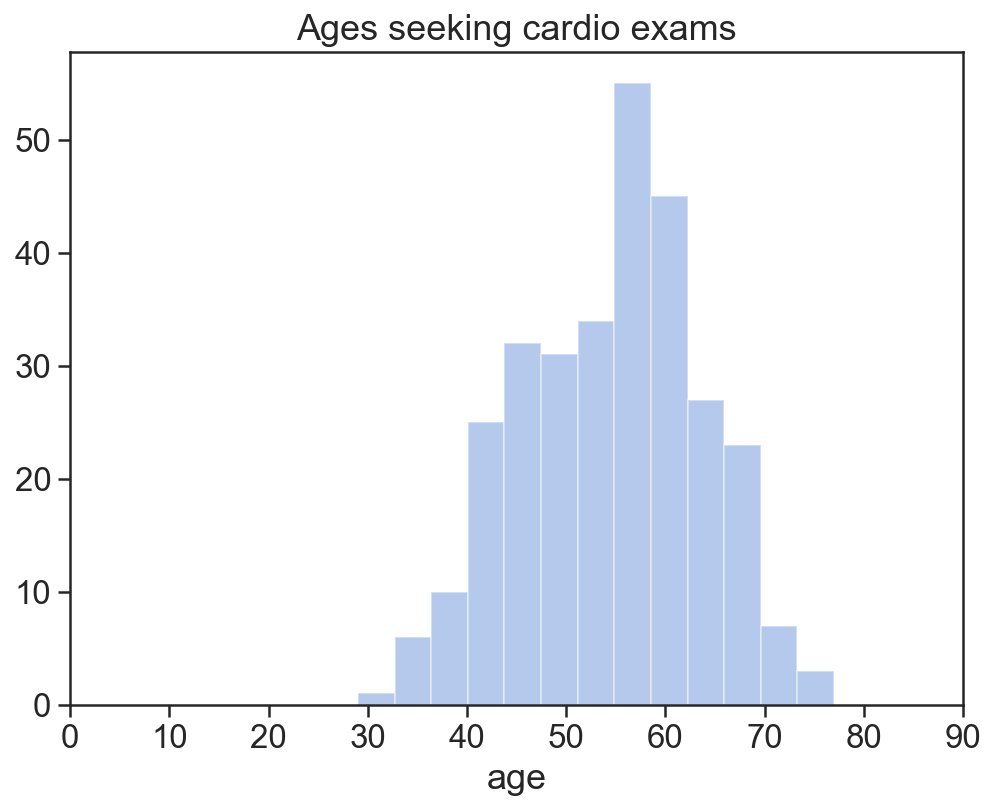

In [51]:
# %load solutions/q01.py
fig, ax = plt.subplots(figsize=(8,6)) 
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
ax = sns.distplot(heart_df.age, kde=False) #, bins=10);
ax.set_xlim(0, 90);
ax.set_title('Ages seeking cardio exams');
#ax.set_xlabel('age of patient')


In [52]:
# your code here
# 02. do men seek help more than women?

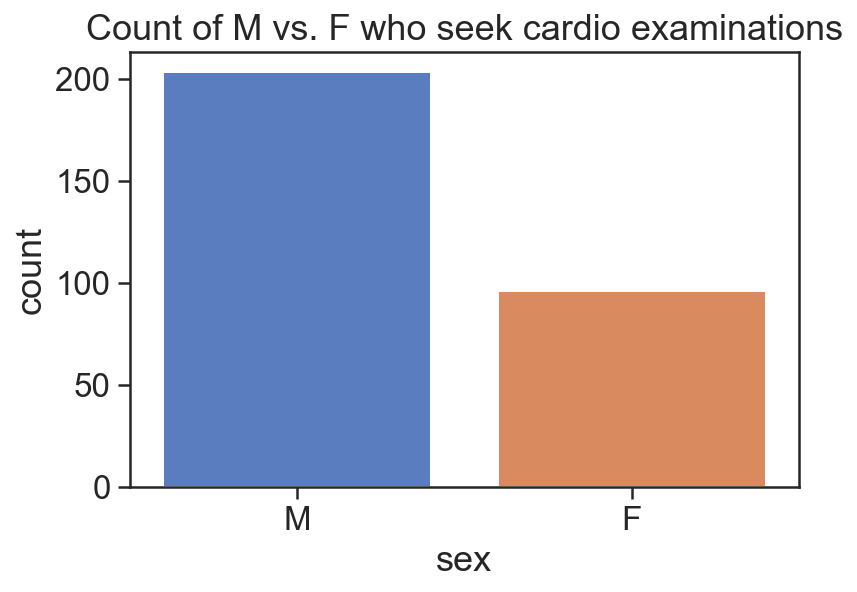

In [53]:
# %load solutions/q02.py
heart_df.replace({'sex': {0.: 'F', 1.: 'M'}}, inplace=True)  
# We would use a countplot
ax = sns.countplot(x="sex", data=heart_df)
ax.set_title('Count of M vs. F who seek cardio examinations');


In [54]:
heart_df.replace({'sex': {'F': 0., 'M': 1.}}, inplace=True)

The number of feature variables (after converting categorical variables to dummy ones) is: 
1 (age) + 1 (sex) + 3 (cp) + 1 (restbp) + 1 (chol) + 1 (fbs) + 2 (restecg) + 
1 (thalach) + 1 (exang) + 1 (oldpeak) + 2 (slope) + 1 (ca) + 2 (thal) = 18

In [55]:
# your code here
# 03. Examine the variables. How do they relate to one another?

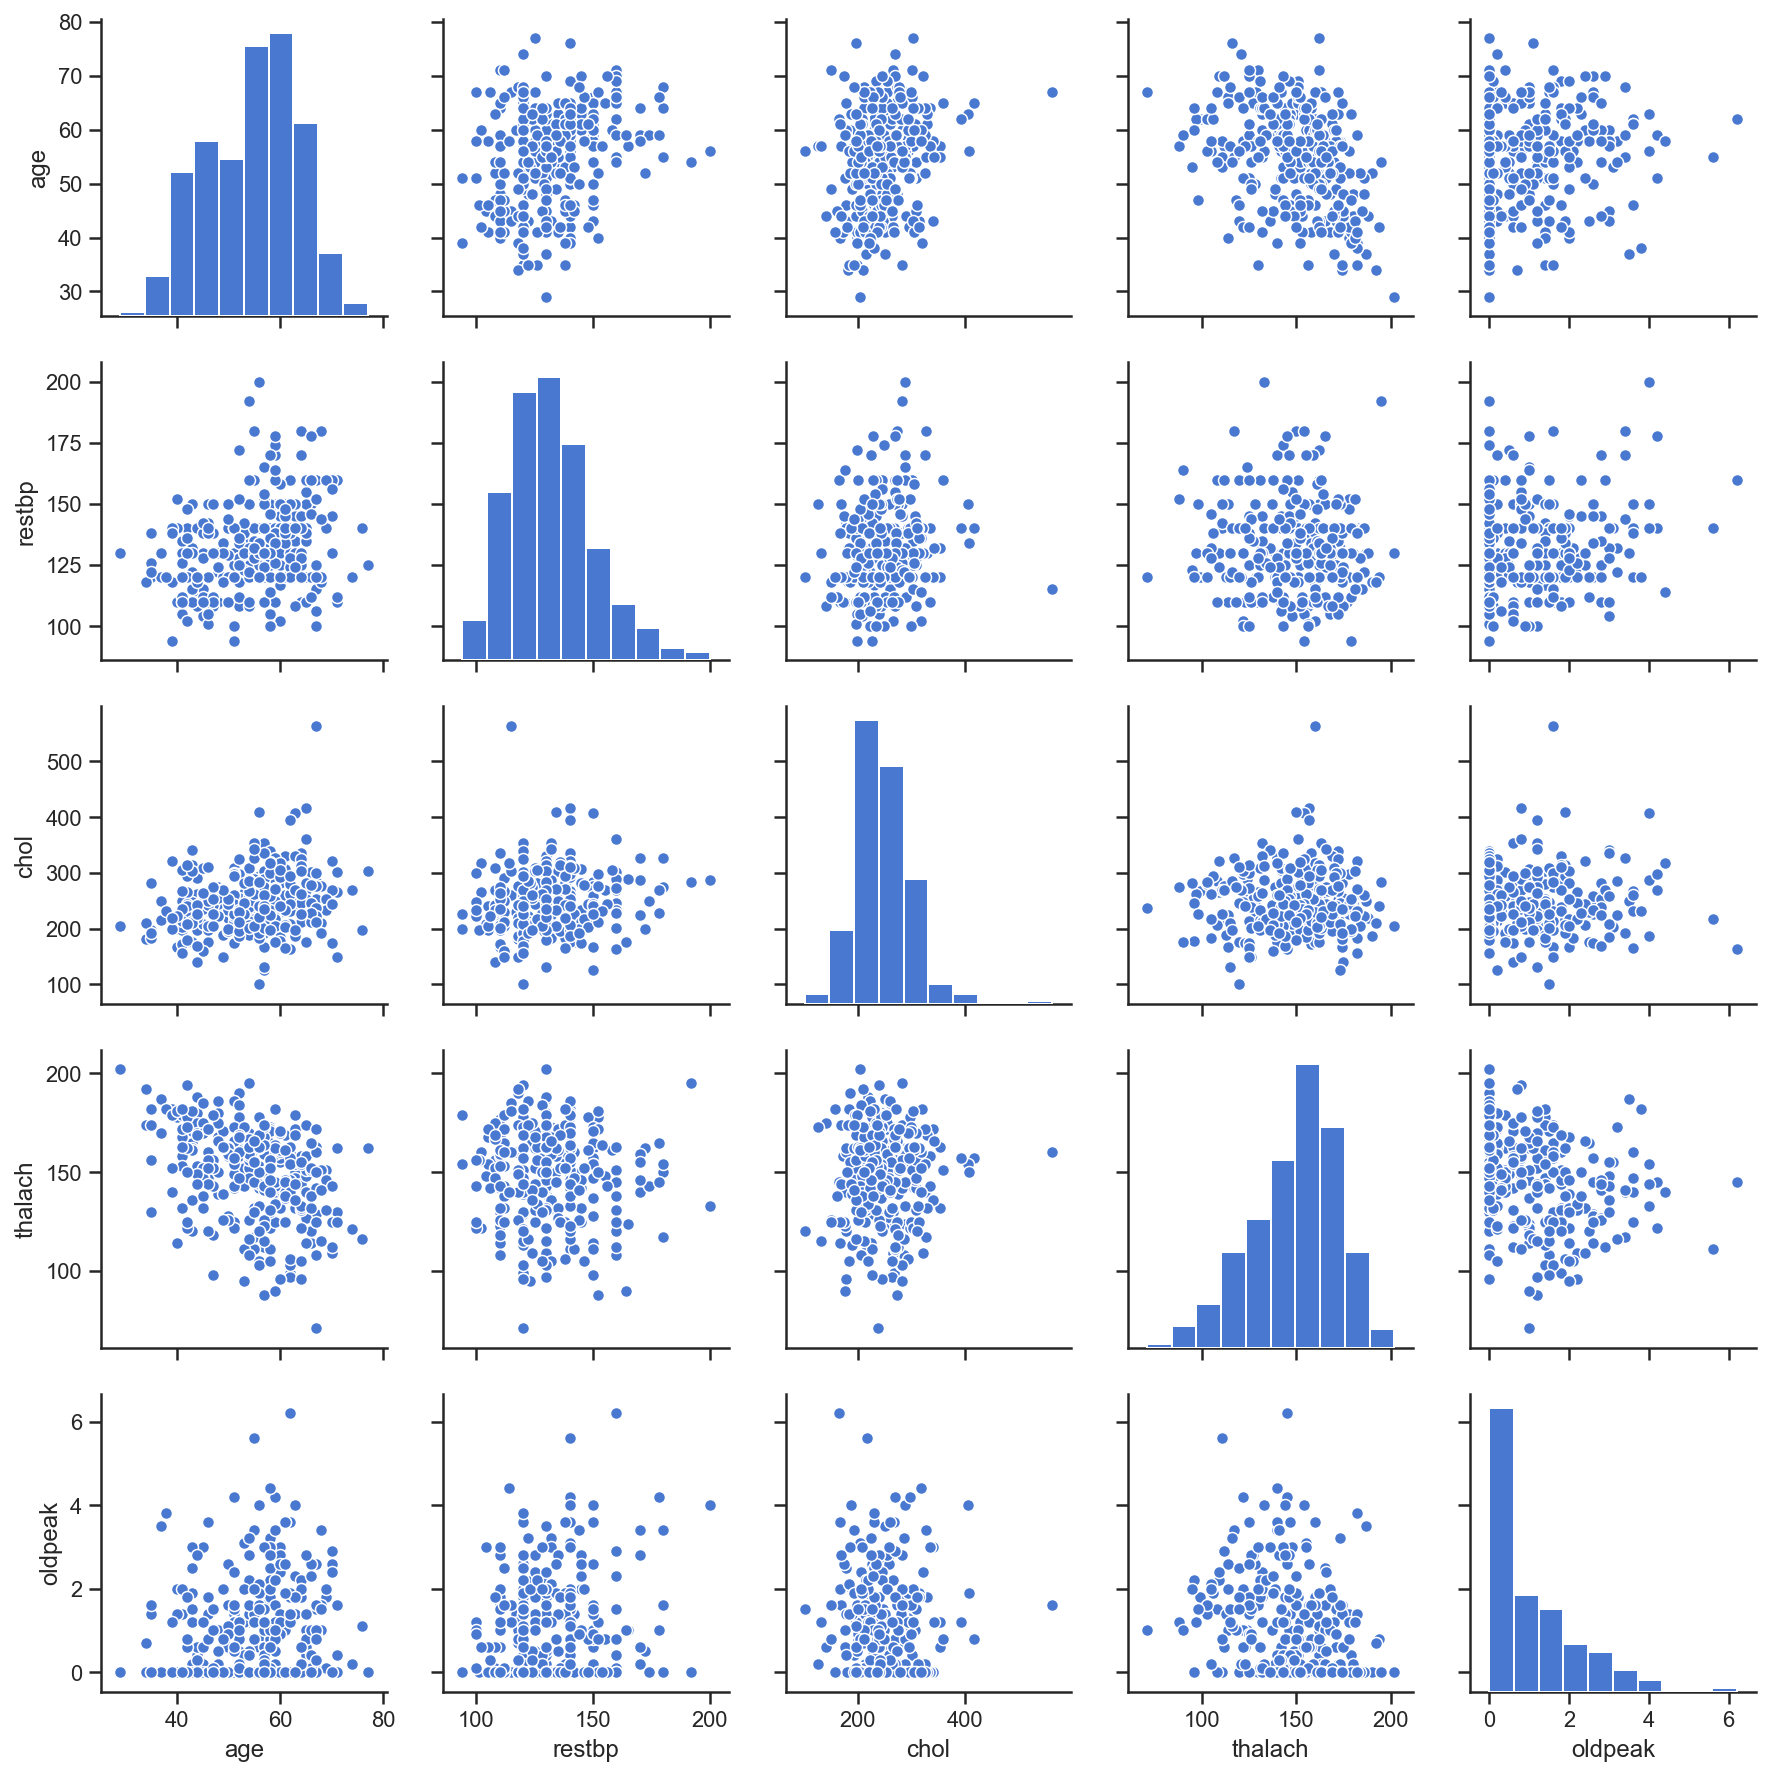

hd         1.000000
thal       0.530603
ca         0.455398
exang      0.427123
oldpeak    0.424947
cp         0.412597
slope      0.335926
sex        0.281912
age        0.223498
restecg    0.157941
restbp     0.153849
chol       0.067350
fbs        0.000192
thalach   -0.430108
Name: hd, dtype: float64

In [56]:
# %load solutions/q03.py
categorical = ["sex", "cp", "fbs", "restecg", "exang",  "slope", "ca", "thal", "hd"]
numerical = ["age","restbp", "chol", "thalach",  "oldpeak"]

# pandas trick: give me all rows of numerical columns
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})
df_to_plot = heart_df.loc[:,numerical]
sns.pairplot(df_to_plot);

plt.show()

# Look at correlation coefficients too
corr_matrix = heart_df.corr()
corr_matrix['hd'].sort_values(ascending=False)


In [57]:
# your code here
# 04. What percentage of men and women seek cardio exams? 

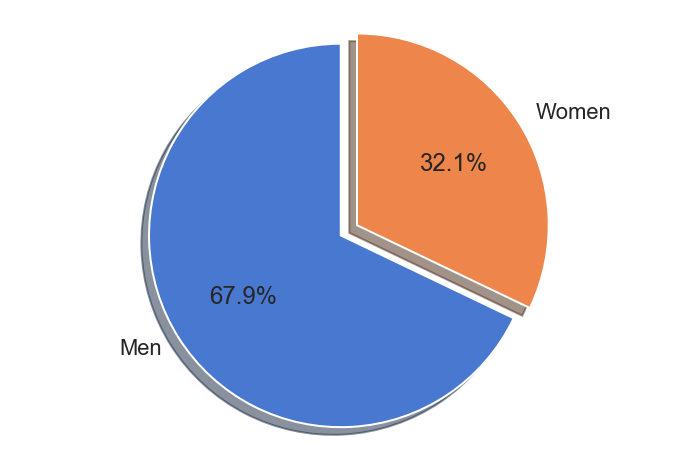

In [58]:
# %load solutions/q04.py
# first find percentages
per_men = (heart_df.sex.value_counts()[1])/(heart_df.sex.value_counts()[0]+heart_df.sex.value_counts()[1])
per_wom = (heart_df.sex.value_counts()[0])/(heart_df.sex.value_counts()[0]+heart_df.sex.value_counts()[1])
per_men, per_wom

labels = 'Men', 'Women'
explode = (0, 0.1)  # only "explode" the 2nd slice 
sizes = [per_men, per_wom]

# First and last time I will use a pie chart, let alone an exploding one!!
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [59]:
# your code here
# 05. Does resting blood pressure increase with age?

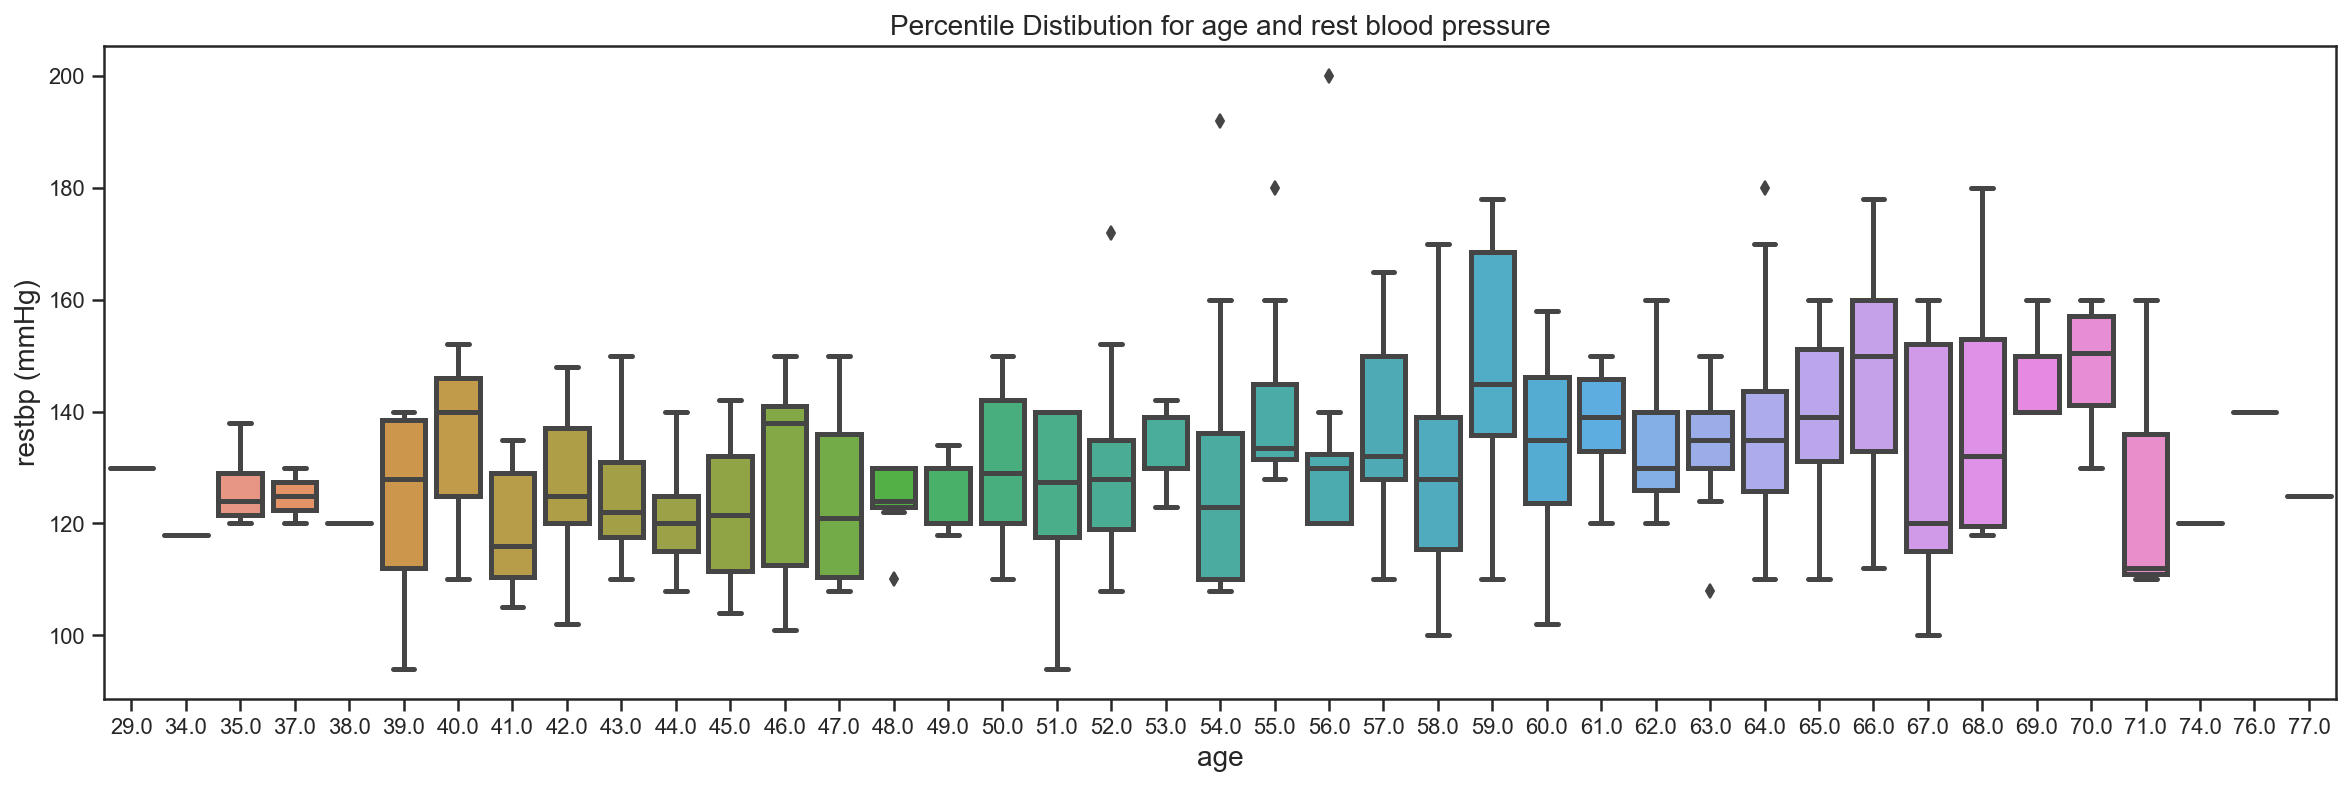

In [60]:
# %load solutions/q05.py
fig, ax = plt.subplots(figsize=(20,6)) 
ax = sns.boxplot(x="age", y="restbp", data=heart_df)
ax.set_ylabel(None);
ax.set_xlabel('age', fontsize=14);
ax.set_ylabel('restbp (mmHg)', fontsize=14);
ax.set_title('Percentile Distibution for age and rest blood pressure', fontsize=14);


## Bonus: Find the hidden pattern

Read the following file into a `pandas` Dataframe: '../data/mystery.csv' and plot it.  How does it look? You should see a beautiful pattern. If not, think of ways to fix the issue.

In [61]:
mystery = pd.read_csv('../data/mystery.csv',  sep=' ', header=None) 
mystery.head()

,0,1
0,1280.0,15.04
1,1423.0,-30.08
2,380.0,-120.32
3,5535.0,135.36
4,5538.0,124.08


In [62]:
# your code here

In [63]:
# this solution will be revealed in the next lab
# %load solutions/mystery.py
